## 0. Data and Target Description

The IBM HR Attrition Case Study is a fictional dataset which aims to identify important factors that might be influential in determining which employee might leave the firm and who may not. We do so by applying a simple EDA and extract some information about the contribution of the features of multiple machine learning models.

## 1. Setting the Environment

### 1.1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

### 1.2. Define Rendering Settings

In [2]:
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

pd.options.display.max_columns = 500

## 2. Loading the Data

In [3]:
DATA_PATH = os.path.join(os.getcwd(), "data/data.csv")
original_data = pd.read_csv(DATA_PATH)
original_data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
print("The dataset has {} rows and {} features including the target".format(original_data.shape[0], original_data.shape[1]))

The dataset has 1470 rows and 35 features including the target


## 3. EDA

### 3.1. Data Types

In [5]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that there are no missing values in any column. The data contains a mix of numeric features (including encoded ordinal categorical features) and nomincal categorical features.

### 3.2. Numeric Features Description

In [6]:
original_data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

In [7]:
original_data.EmployeeNumber.nunique()

1470

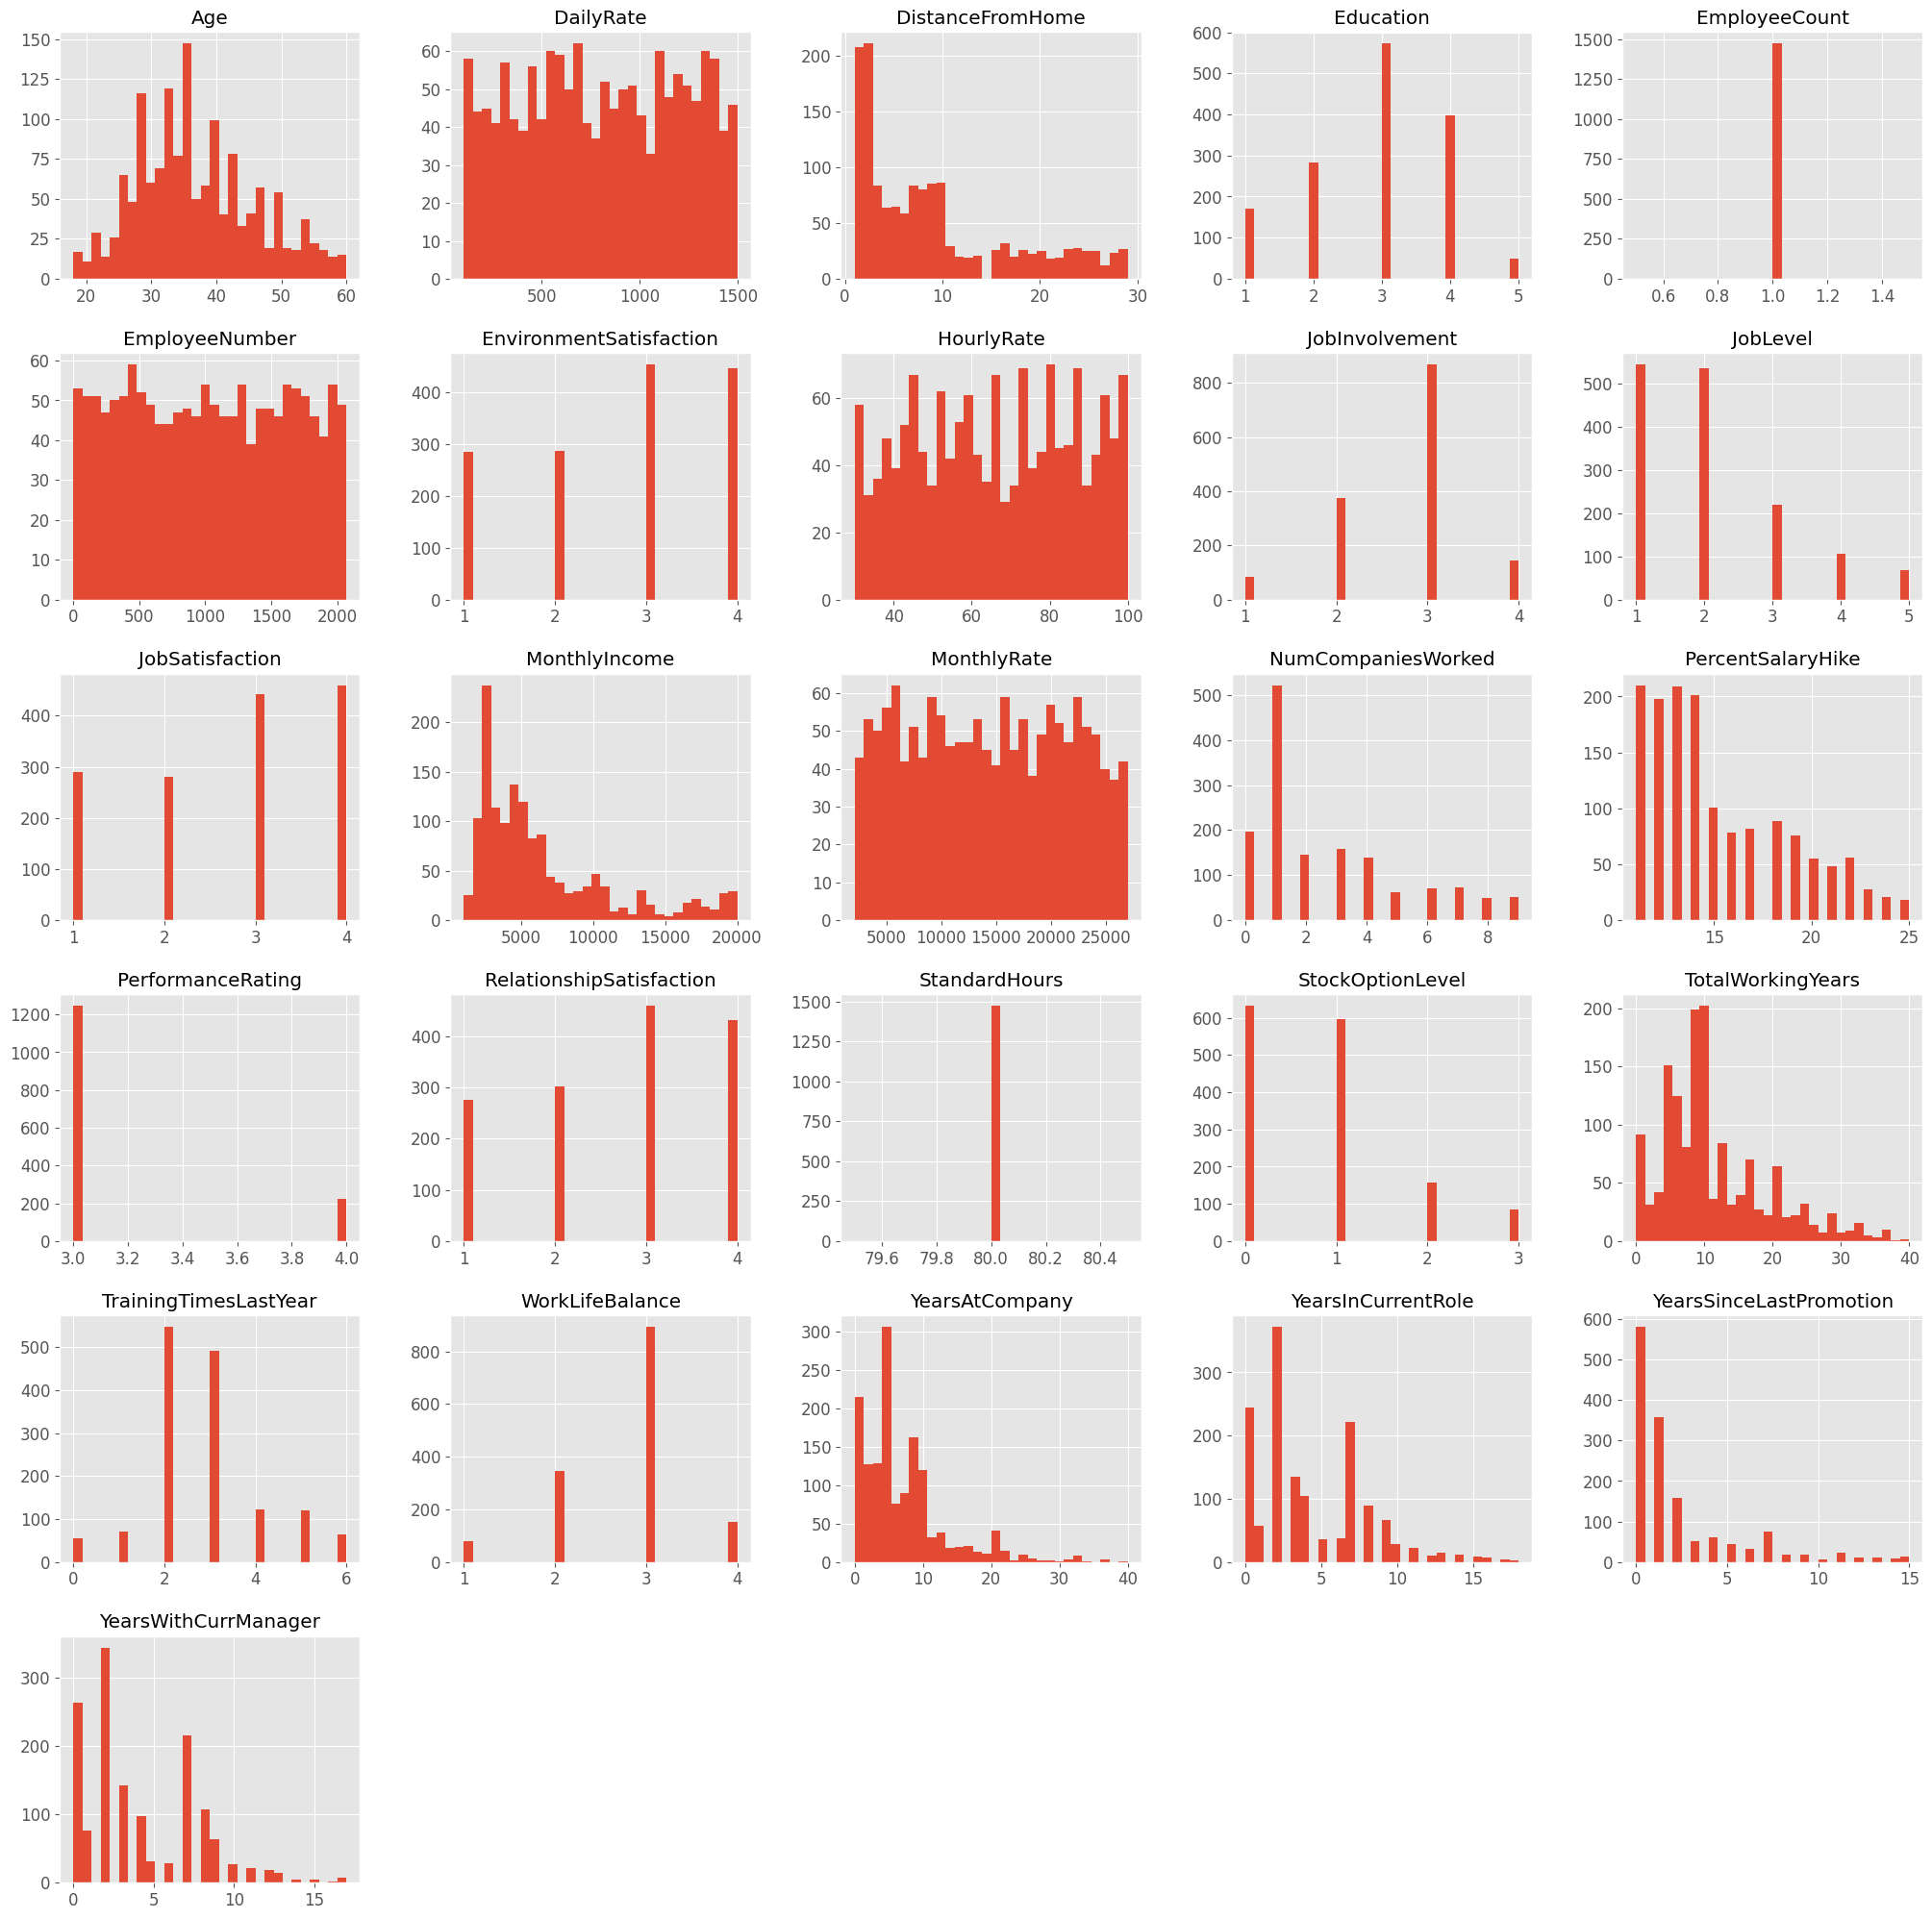

In [8]:
original_data.hist(figsize=(25, 25), bins = 30);

We can observe from the description and the above visualization that:
* Some of the features are skewed including `DistanceFromHome`, `MonthlyIncome`, `TotalWorkingYears`, `YearsAtCompany`.
* A couple of features `EmployeeCount`, `StandardHours` have a unique value each. They are redundant features and should be removed.
* Examining the `EmployeeNumber` feature, we found that each employee has a unique `EmployeeNumber` value and thus it's considered as an ID column and should be removed.

In [9]:
original_data.drop(columns = ["EmployeeCount", "StandardHours", "EmployeeNumber"], inplace = True)

### 3.3. Numeric Features Visualizations

We copy a dataframe to freely manipulate it for our visualization stuff. For example, we will add a new column which numerically represent the `Attrition` column.

In [10]:
visualization_df = original_data.copy()
visualization_df["Attrition_n"] = visualization_df.Attrition.map({"Yes":1, "No":0})

#### 3.3.1. `Age`

In [11]:
age_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["Age"].reset_index()
age_stats

Attrition       mean      std  min  max
0        No  37.561233  8.88836   18   60
1       Yes  33.607595  9.68935   18   58

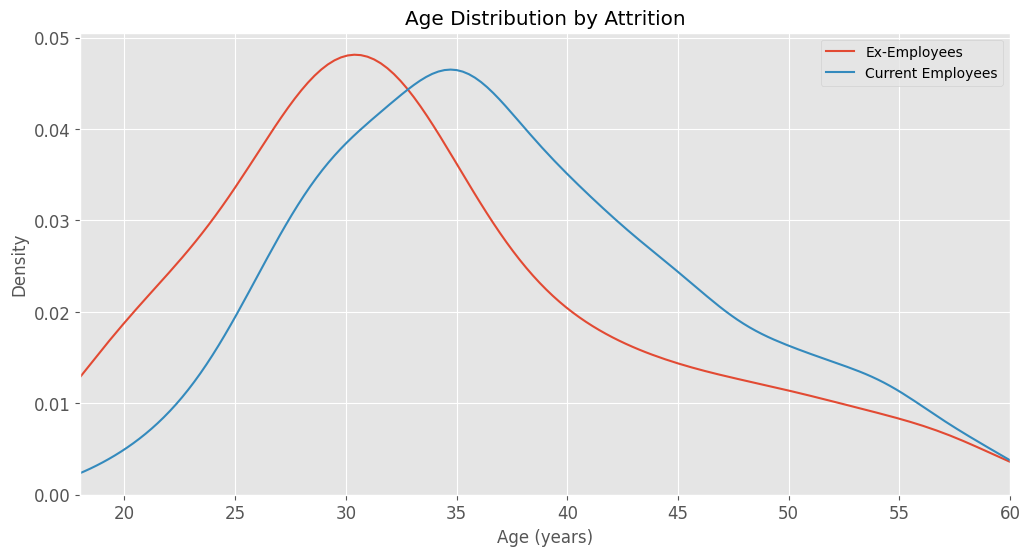

In [12]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "Age",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "Age",
    label = "Current Employees"
)

plt.xlim([18, 60])
plt.xlabel("Age (years)")
plt.ylabel("Density")
plt.title("Age Distribution by Attrition")
plt.legend()
plt.show()

We can see that the average age of the employees that stay in the company is 37.6 while for those who leave is 33.6. We can also notice that after the age of 38, the employee tends to stay.

#### 3.3.2. `DistanceFromHome`

In [13]:
distance_from_home_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["DistanceFromHome"].reset_index()
distance_from_home_stats

Attrition       mean       std  min  max
0        No   8.915653  8.012633    1   29
1       Yes  10.632911  8.452525    1   29

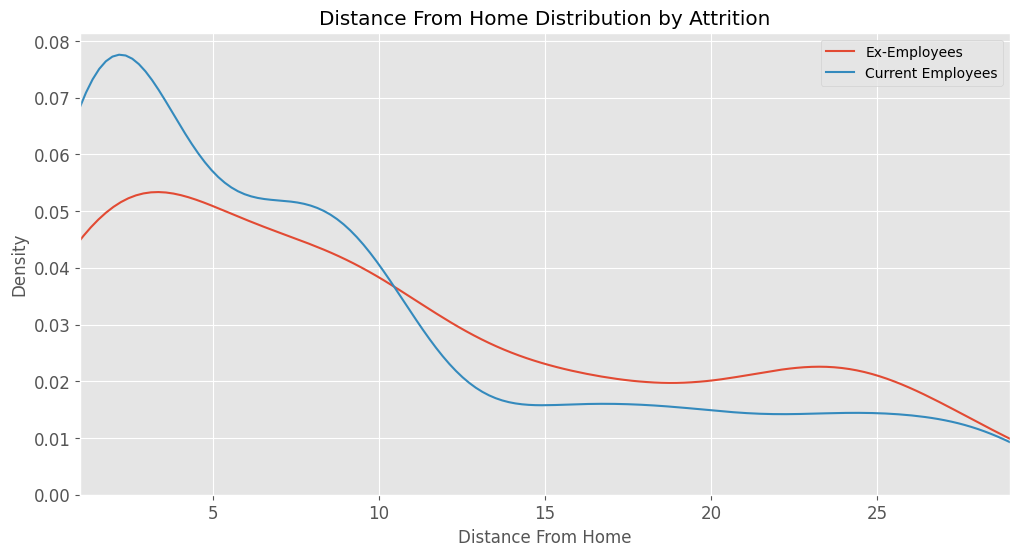

In [14]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "DistanceFromHome",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "DistanceFromHome",
    label = "Current Employees"
)
plt.xlim(1, 29)
plt.legend()
plt.xlabel("Distance From Home")
plt.ylabel("Density")
plt.title("Distance From Home Distribution by Attrition")
plt.show()

We can notice that the mean distance form home for the employees who left is higher than for those who stayed by 1.6 miles. After 12 miles, the employee tend to leave. However the distributions are quite similar.

#### 3.3.3. `TrainingTimesLastYear`

In [15]:
training_times_df = visualization_df.groupby("TrainingTimesLastYear").agg({"Attrition_n": ["mean", "count"]})
new_columns = ["_".join(column_pair) for column_pair in list(training_times_df.columns)]
training_times_df.columns = new_columns
training_times_df["PercentageLeaving"] = training_times_df.Attrition_n_mean * 100
training_times_df = training_times_df.reset_index()
training_times_df

TrainingTimesLastYear  Attrition_n_mean  Attrition_n_count  \
0                      0          0.277778                 54   
1                      1          0.126761                 71   
2                      2          0.179159                547   
3                      3          0.140530                491   
4                      4          0.211382                123   
5                      5          0.117647                119   
6                      6          0.092308                 65   

   PercentageLeaving  
0          27.777778  
1          12.676056  
2          17.915905  
3          14.052953  
4          21.138211  
5          11.764706  
6           9.230769

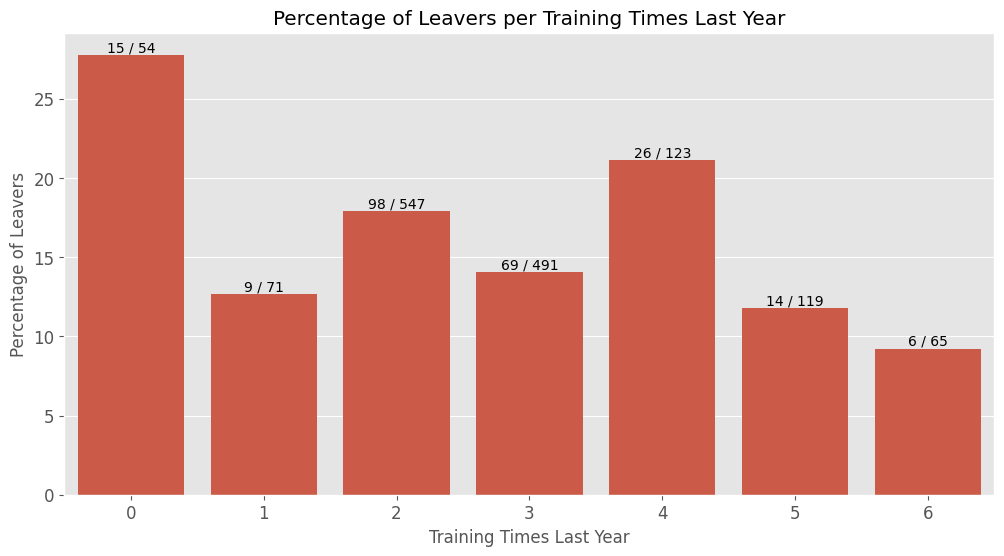

In [16]:
sns.barplot(
    data = training_times_df,
    x = "TrainingTimesLastYear",
    y = "PercentageLeaving",
    color = sns.color_palette()[0]
)

plt.xlabel("Training Times Last Year")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Training Times Last Year")

for index in range(training_times_df.shape[0]):
    percentage = training_times_df.loc[index, "Attrition_n_mean"]
    count = training_times_df.loc[index, "Attrition_n_count"]
    percentage_s = "{} / {}".format(int(percentage * count), count)
    plt.text(x = index, y = training_times_df.loc[index, "PercentageLeaving"] + 0.2, s = percentage_s, ha = "center")

We can that employee that didn't recieve training during the last year are more likely to leave. Though the realtionship isn't inversely direct between the attrition rates and the training times in last year. 

#### 3.3.4.`NumCompaniesWorked`

In [17]:
companies_df = visualization_df.groupby("NumCompaniesWorked").agg({"Attrition_n": ["mean", "count"]})
new_columns = ["_".join(column_pair) for column_pair in list(companies_df.columns)]
companies_df.columns = new_columns
companies_df["PercentageLeaving"] = companies_df.Attrition_n_mean * 100
companies_df = companies_df.reset_index()
companies_df

NumCompaniesWorked  Attrition_n_mean  Attrition_n_count  PercentageLeaving
0                   0          0.116751                197          11.675127
1                   1          0.188100                521          18.809981
2                   2          0.109589                146          10.958904
3                   3          0.100629                159          10.062893
4                   4          0.122302                139          12.230216
5                   5          0.253968                 63          25.396825
6                   6          0.228571                 70          22.857143
7                   7          0.229730                 74          22.972973
8                   8          0.122449                 49          12.244898
9                   9          0.230769                 52          23.076923

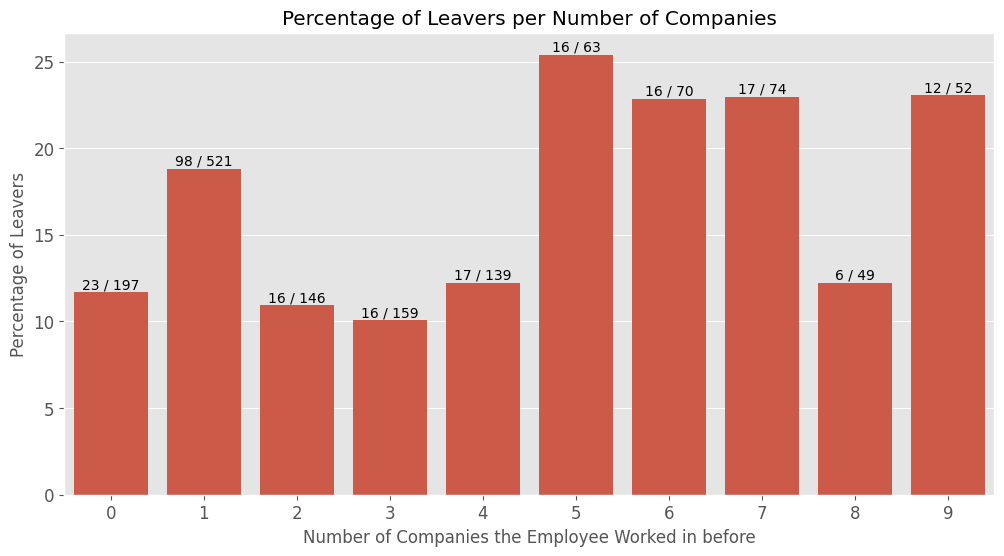

In [18]:
sns.barplot(
    data = companies_df,
    x = "NumCompaniesWorked",
    y = "PercentageLeaving",
    color = sns.color_palette()[0]
)

plt.xlabel("Number of Companies the Employee Worked in before")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Number of Companies")

for index in range(companies_df.shape[0]):
    percentage = companies_df.loc[index, "Attrition_n_mean"]
    count = companies_df.loc[index, "Attrition_n_count"]
    percentage_s = "{} / {}".format(int(percentage * count), count)
    plt.text(x = index, y = companies_df.loc[index, "PercentageLeaving"] + 0.2, s = percentage_s, ha = "center")

We can that employees who worked for more than 5 companies before this company, except for the number 8 for some reasons, are more likely to leave their work.

#### 3.3.5. `YearsAtCompany`

In [19]:
years_at_company_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["YearsAtCompany"].reset_index()
years_at_company_stats

Attrition      mean       std  min  max
0        No  7.369019  6.096298    0   37
1       Yes  5.130802  5.949984    0   40

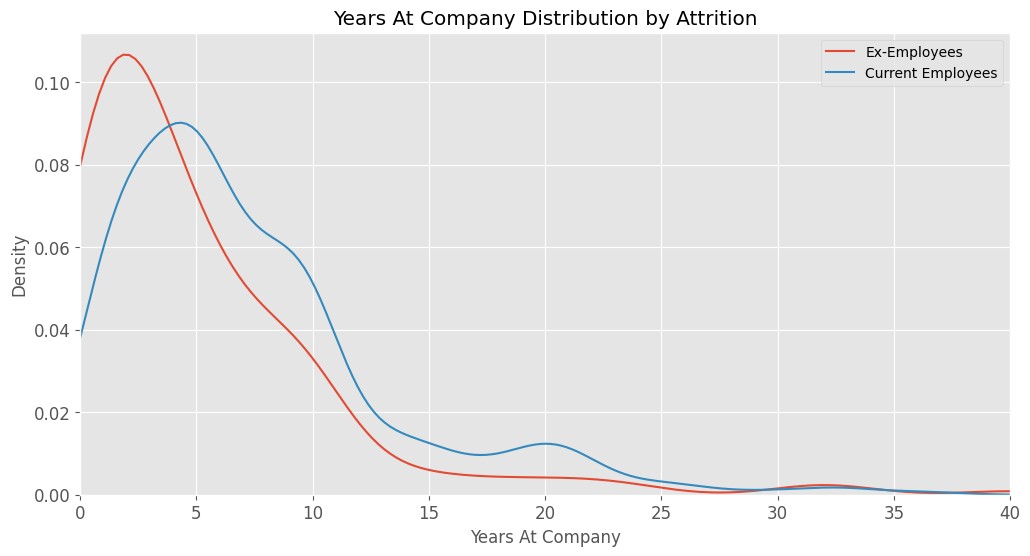

In [20]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "YearsAtCompany",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "YearsAtCompany",
    label = "Current Employees"
)
plt.xlim(0, 40)
plt.legend()
plt.xlabel("Years At Company")
plt.ylabel("Density")
plt.title("Years At Company Distribution by Attrition")
plt.show()

We can see that the average years spent in the company for the current employees is higher than those who left by 1.2 years. After 5 years, the employee is more likely to stay in the company.

#### 3.3.6. `YearsInCurrentRole`

In [21]:
years_in_curr_role_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["YearsInCurrentRole"].reset_index()
years_in_curr_role_stats

Attrition      mean       std  min  max
0        No  4.484185  3.649402    0   18
1       Yes  2.902954  3.174827    0   15

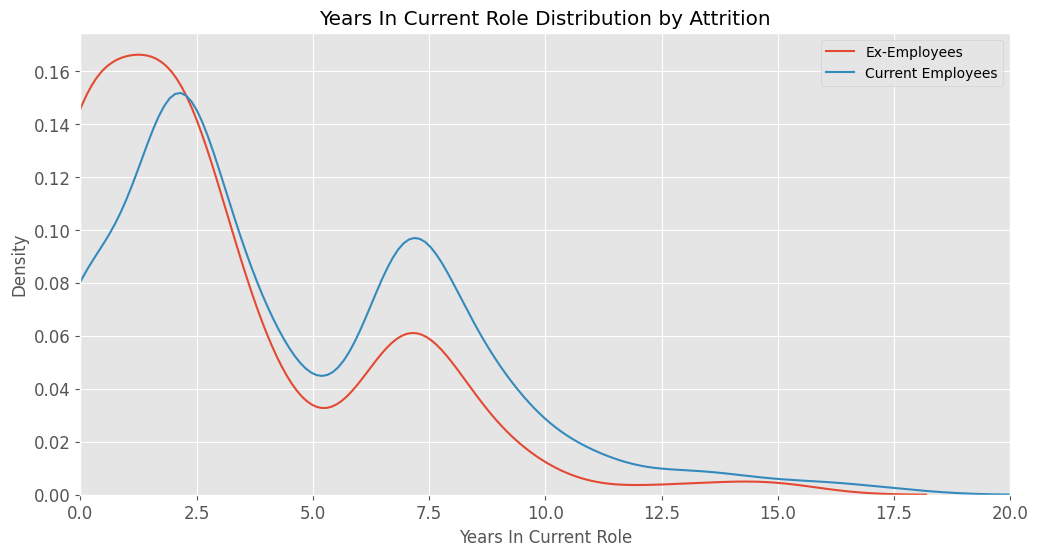

In [22]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "YearsInCurrentRole",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "YearsInCurrentRole",
    label = "Current Employees"
)

plt.xlim(0, 20)
plt.legend()
plt.xlabel("Years In Current Role")
plt.ylabel("Density")
plt.title("Years In Current Role Distribution by Attrition")
plt.show()

If an employee stayed more than 5 years in his current role, he is more likely to stay. Less than 2.5 years is more likely to leave.

#### 3.3.7. `YearsSinceLastPromotion`

In [23]:
years_since_last_promotion_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["YearsSinceLastPromotion"].reset_index()
years_since_last_promotion_stats

Attrition      mean       std  min  max
0        No  2.234388  3.234762    0   15
1       Yes  1.945148  3.153077    0   15

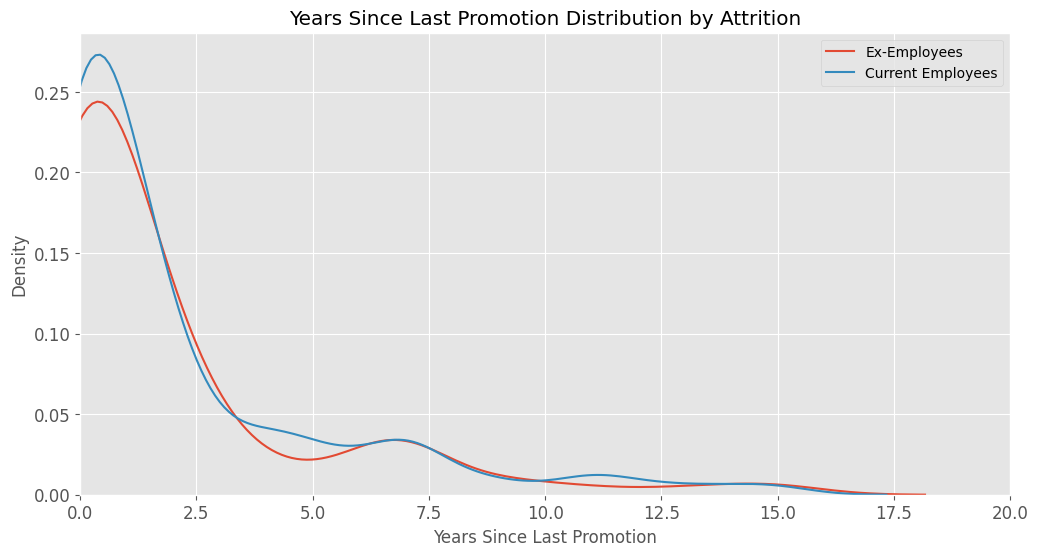

In [24]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "YearsSinceLastPromotion",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "YearsSinceLastPromotion",
    label = "Current Employees"
)

plt.xlim(0, 20)
plt.legend()
plt.xlabel("Years Since Last Promotion")
plt.ylabel("Density")
plt.title("Years Since Last Promotion Distribution by Attrition")
plt.show()

There is no big difference between the distributions of the years since last promotion for both current and ex-employees.

#### 3.3.8. `YearsWithCurrManager`

In [25]:
years_with_curr_manager_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["YearsWithCurrManager"].reset_index()
years_with_curr_manager_stats

Attrition      mean       std  min  max
0        No  4.367397  3.594116    0   17
1       Yes  2.852321  3.143349    0   14

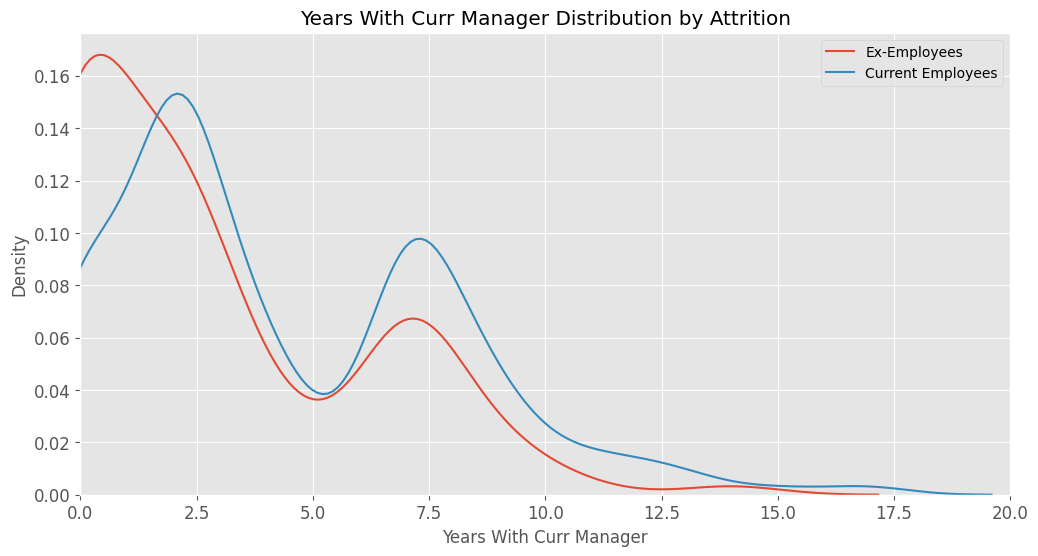

In [26]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "YearsWithCurrManager",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "YearsWithCurrManager",
    label = "Current Employees"
)

plt.xlim(0, 20)
plt.legend()
plt.xlabel("Years With Curr Manager")
plt.ylabel("Density")
plt.title("Years With Curr Manager Distribution by Attrition")
plt.show()

We can see that before 2 years with the current manager, the employee is more likely to leave. Between 3 and 5 years, the data doesn't show difference for both types. But after 5 years, the employee is more likely to stay.

#### 3.3.9. `MonthlyIncome`

In [27]:
monthly_income_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["MonthlyIncome"].reset_index()
monthly_income_stats

Attrition         mean          std   min    max
0        No  6832.739659  4818.208001  1051  19999
1       Yes  4787.092827  3640.210367  1009  19859

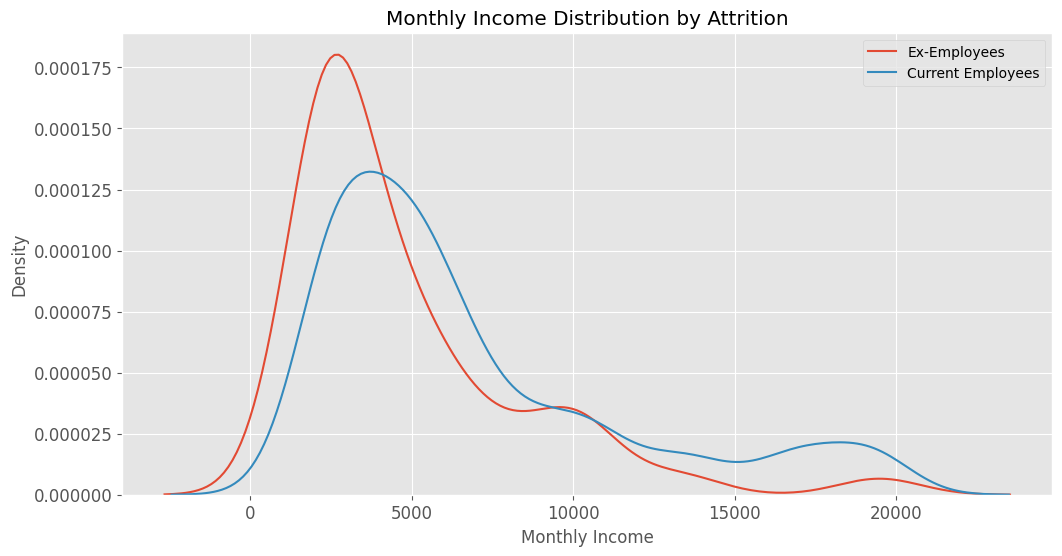

In [28]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "MonthlyIncome",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "MonthlyIncome",
    label = "Current Employees"
)

plt.legend()
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.title("Monthly Income Distribution by Attrition")
plt.show()

We can notice that employees whose monthly income is less than 4k are more likely to leave. **NOTE:** there are some other features about the income. We will probably get the same results and they may be correlated. 

#### 3.3.10. `PercentSalaryHike`

In [29]:
percent_salary_hike_stats = visualization_df.groupby("Attrition").agg(["mean", "std", "min", "max"])["PercentSalaryHike"].reset_index()
percent_salary_hike_stats

Attrition       mean       std  min  max
0        No  15.231144  3.639511   11   25
1       Yes  15.097046  3.770294   11   25

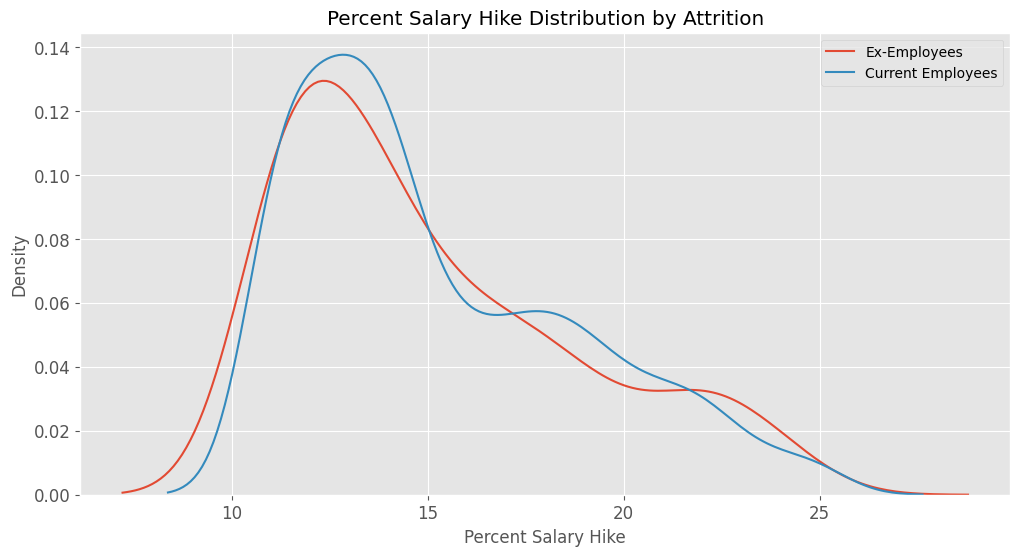

In [30]:
sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "Yes"],
    x = "PercentSalaryHike",
    label = "Ex-Employees"
)

sns.kdeplot(
    data = visualization_df[visualization_df["Attrition"] == "No"],
    x = "PercentSalaryHike",
    label = "Current Employees"
)

plt.legend()
plt.xlabel("Percent Salary Hike")
plt.ylabel("Density")
plt.title("Percent Salary Hike Distribution by Attrition")
plt.show()

The distributions of salary rise percentages are the same for the employees who stayed or left.

### 3.4. Categorical Features Visualizations

#### 3.4.1. `EducationField`

In [31]:
education_field_df = pd.DataFrame(columns=["EducationField", "LeavingPercentage", "Percentage_s"])
for index, education_field in enumerate(visualization_df.EducationField.unique()):
    leaving_count = visualization_df[
            ((visualization_df['EducationField'] == education_field) & (visualization_df['Attrition'] == "Yes"))
        ].shape[0]
    field_count = visualization_df[visualization_df["EducationField"] == education_field].shape[0]
    education_field_df.loc[index, "EducationField"] = education_field
    education_field_df.loc[index, "LeavingPercentage"] = leaving_count / field_count * 100
    education_field_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, field_count)

education_field_df.sort_values("LeavingPercentage", inplace = True, ignore_index = True)

education_field_df

EducationField LeavingPercentage Percentage_s
0             Other         13.414634      11 / 82
1           Medical         13.577586     63 / 464
2     Life Sciences         14.686469     89 / 606
3         Marketing         22.012579     35 / 159
4  Technical Degree         24.242424     32 / 132
5   Human Resources         25.925926       7 / 27

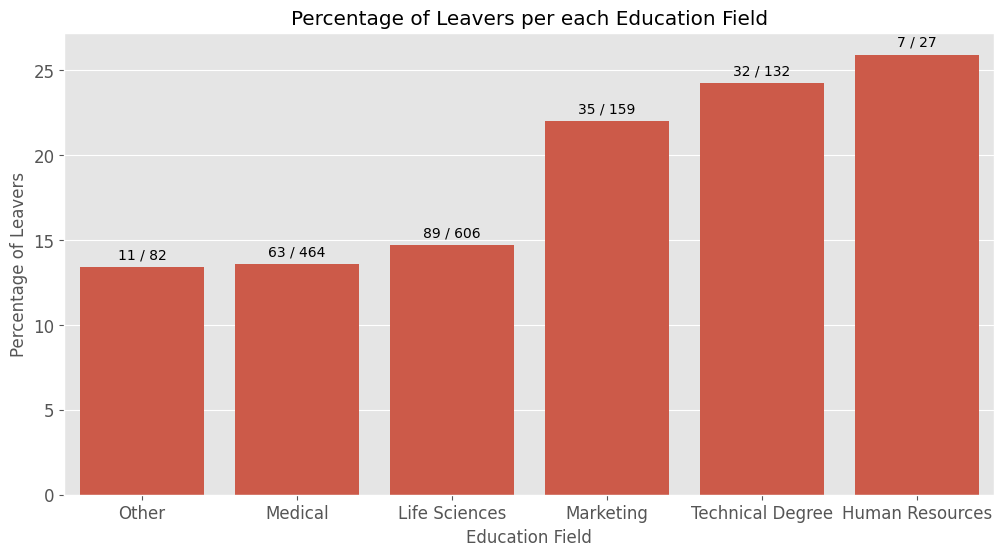

In [32]:
sns.barplot(
    data = education_field_df,
    x = "EducationField",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)
plt.xlabel("Education Field")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per each Education Field")

for index in range(education_field_df.shape[0]):
    plt.text(x = index, y = education_field_df.loc[index, "LeavingPercentage"] + 0.5, s = education_field_df.loc[index, "Percentage_s"], ha = "center")

plt.show()


We can see that the employees with a **Human Resources** degree, **Technical Degree**, and **Marketing** degree are more vulnerable to attrition than those who hold a degree in other fields.

#### 3.4.2. `Gender`

In [33]:
gender_df = pd.DataFrame(columns=["Gender", "LeavingPercentage", "Percentage_s"])
for index, gender in enumerate(visualization_df.Gender.unique()):
    leaving_count = visualization_df[
            ((visualization_df['Gender'] == gender) & (visualization_df['Attrition'] == "Yes"))
        ].shape[0]
    gender_count = visualization_df[visualization_df["Gender"] == gender].shape[0]
    gender_df.loc[index, "Gender"] = gender
    gender_df.loc[index, "LeavingPercentage"] = leaving_count / gender_count * 100
    gender_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, gender_count)

gender_df.sort_values("LeavingPercentage", inplace = True, ignore_index = True)

gender_df

Gender LeavingPercentage Percentage_s
0  Female         14.795918     87 / 588
1    Male         17.006803    150 / 882

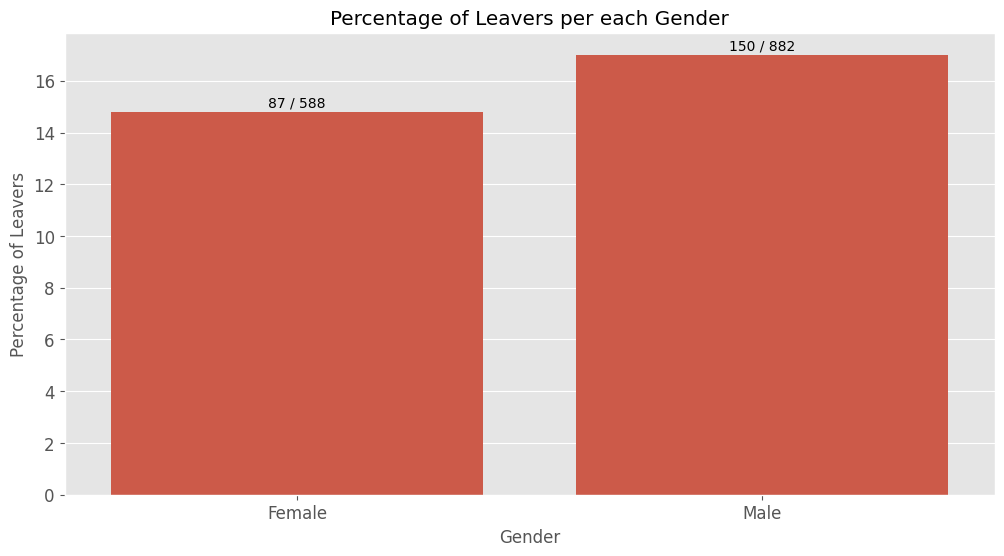

In [34]:
sns.barplot(
    data = gender_df,
    x = "Gender",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Gender")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per each Gender")


for index in range(gender_df.shape[0]):
    plt.text(x = index, y = gender_df.loc[index, "LeavingPercentage"] + 0.2, s = gender_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

We can see that the ratios of the ex-employees given that they are **Male** or **Female** are close $p(attrition|gender)$. Only 2% higher for the case of a **Male** employee.

#### 3.4.3. `MaritalStatus`

In [35]:
marital_status_df = pd.DataFrame(columns=["MaritalStatus", "LeavingPercentage", "Percentage_s"])
for index, marital_status in enumerate(visualization_df.MaritalStatus.unique()):
    leaving_count = visualization_df[
            ((visualization_df['MaritalStatus'] == marital_status) & (visualization_df['Attrition'] == "Yes"))
        ].shape[0]
    marital_status_count = visualization_df[visualization_df["MaritalStatus"] == marital_status].shape[0]
    marital_status_df.loc[index, "MaritalStatus"] = marital_status
    marital_status_df.loc[index, "LeavingPercentage"] = leaving_count / marital_status_count * 100
    marital_status_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, marital_status_count)

marital_status_df.sort_values("LeavingPercentage", inplace = True, ignore_index = True)

marital_status_df

MaritalStatus LeavingPercentage Percentage_s
0      Divorced         10.091743     33 / 327
1       Married         12.481426     84 / 673
2        Single         25.531915    120 / 470

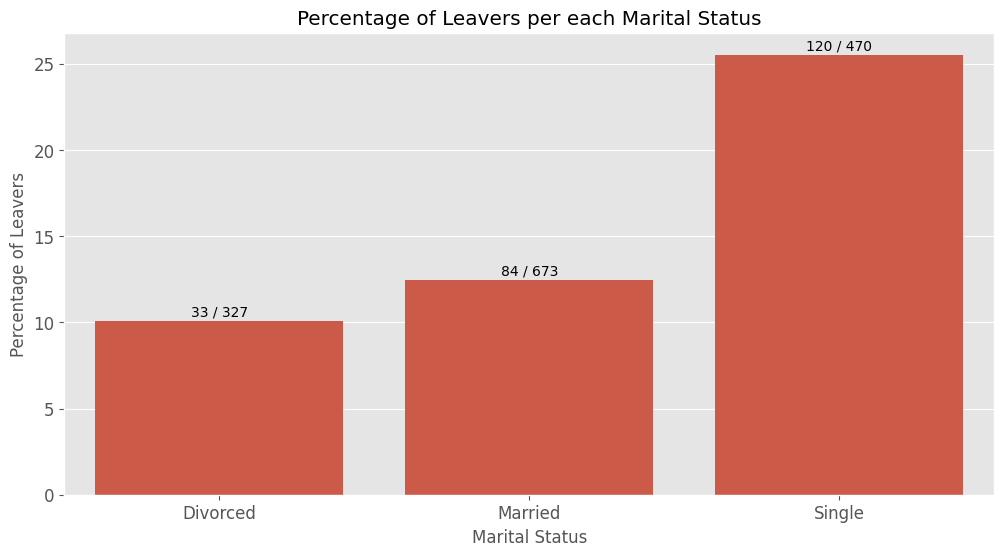

In [36]:
sns.barplot(
    data = marital_status_df,
    x = "MaritalStatus",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Marital Status")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per each Marital Status")

for index in range(marital_status_df.shape[0]):
    plt.text(x = index, y = marital_status_df.loc[index, "LeavingPercentage"] + 0.3, s = marital_status_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

We can see that, and with a large margin, that **Single** employees tend to leave more than those who are **Married** or **Divorced**.

#### 3.4.4. `Department`

In [37]:
department_df = pd.DataFrame(columns = ["Department", "LeavingPercentage", "Percentage_s"])
for index, department in enumerate(visualization_df.Department.unique()):
    department_count = visualization_df[visualization_df.Department == department].shape[0]
    leaving_count = visualization_df[(visualization_df.Department == department) & (visualization_df.Attrition == "Yes")].shape[0]
    department_df.loc[index, "Department"] = department
    department_df.loc[index, "LeavingPercentage"] = leaving_count / department_count * 100
    department_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, department_count)

department_df.sort_values("LeavingPercentage", inplace = True, ignore_index = True)

department_df.sort_values("LeavingPercentage", inplace=True)
department_df

Department LeavingPercentage Percentage_s
0  Research & Development          13.83975    133 / 961
1         Human Resources         19.047619      12 / 63
2                   Sales         20.627803     92 / 446

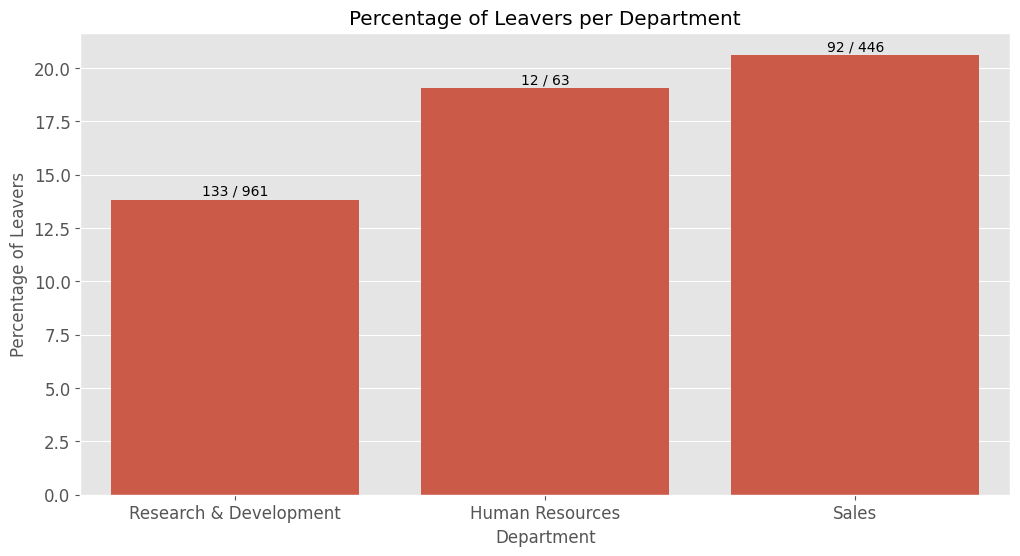

In [38]:
sns.barplot(
    data = department_df,
    x = "Department",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)
plt.xlabel("Department")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Department")

for index in range(department_df.shape[0]):
    plt.text(x = index, y = department_df.loc[index, "LeavingPercentage"] + 0.2, s = department_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

We can notice that employees who work in **Sales** and **Human Resources** are more vulnerable to attrition than those who work in **Research & Development**.

#### 3.4.5. `BusinessTravel`

In [39]:
business_travel_df = pd.DataFrame(columns = ["BusinessTravel", "LeavingPercentage", "Percentage_s"])
for index, business_travel_type in enumerate(visualization_df.BusinessTravel.unique()):
    business_travel_type_count = visualization_df[visualization_df.BusinessTravel == business_travel_type].shape[0]
    leaving_count = visualization_df[(visualization_df.BusinessTravel == business_travel_type) & (visualization_df.Attrition == "Yes")].shape[0]
    business_travel_df.loc[index, "BusinessTravel"] = business_travel_type
    business_travel_df.loc[index, "LeavingPercentage"] = leaving_count / business_travel_type_count * 100
    business_travel_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, business_travel_type_count)

business_travel_df.sort_values("LeavingPercentage", inplace = True, ignore_index = True)

business_travel_df.sort_values("LeavingPercentage", inplace=True)
business_travel_df

BusinessTravel LeavingPercentage Percentage_s
0         Non-Travel               8.0     12 / 150
1      Travel_Rarely         14.956855   156 / 1043
2  Travel_Frequently         24.909747     69 / 277

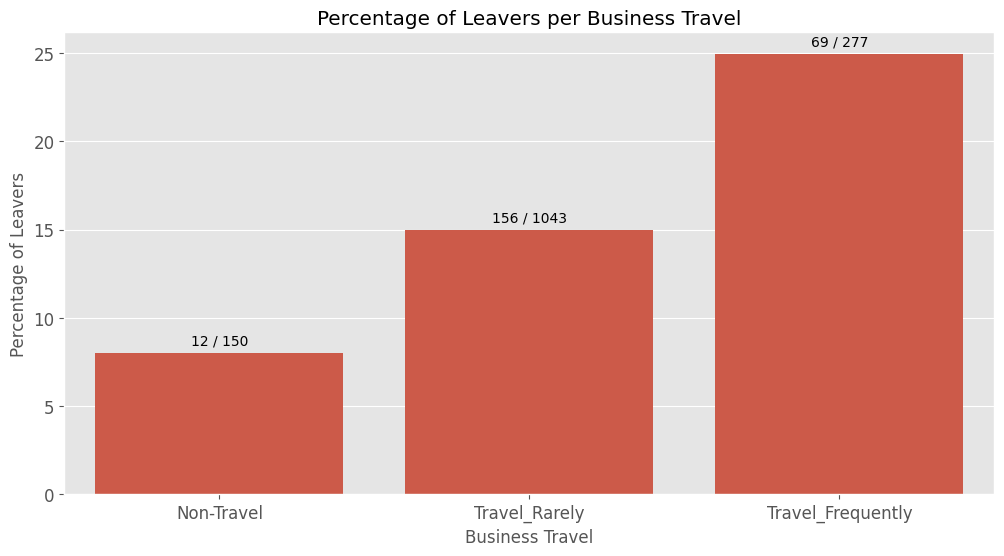

In [40]:
sns.barplot(
    data = business_travel_df,
    x = "BusinessTravel",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)
plt.xlabel("Business Travel")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Business Travel")

for index in range(business_travel_df.shape[0]):
    plt.text(x = index, y = business_travel_df.loc[index, "LeavingPercentage"] + 0.5, s = business_travel_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

#### 3.4.6. `JobRole`

In [41]:
job_role_df = pd.DataFrame(columns = ["JobRole", "LeavingPercentage", "Percentage_s"])
for index, job_role in enumerate(visualization_df.JobRole.unique()):
    job_role_count = visualization_df[visualization_df.JobRole == job_role].shape[0]
    leaving_count = visualization_df[(visualization_df.JobRole == job_role) & (visualization_df.Attrition == "Yes")].shape[0]
    job_role_df.loc[index, "JobRole"] = job_role
    job_role_df.loc[index, "LeavingPercentage"] = leaving_count / job_role_count * 100
    job_role_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, job_role_count)

job_role_df.sort_values("LeavingPercentage", inplace = True, ignore_index = True)

job_role_df.sort_values("LeavingPercentage", inplace = True)
job_role_df

JobRole LeavingPercentage Percentage_s
0          Research Director               2.5       2 / 80
1                    Manager          4.901961      5 / 102
2  Healthcare Representative          6.870229      9 / 131
3     Manufacturing Director          6.896552     10 / 145
4         Research Scientist          16.09589     47 / 292
5            Sales Executive         17.484663     57 / 326
6            Human Resources         23.076923      12 / 52
7      Laboratory Technician         23.938224     62 / 259
8       Sales Representative         39.759036      33 / 83

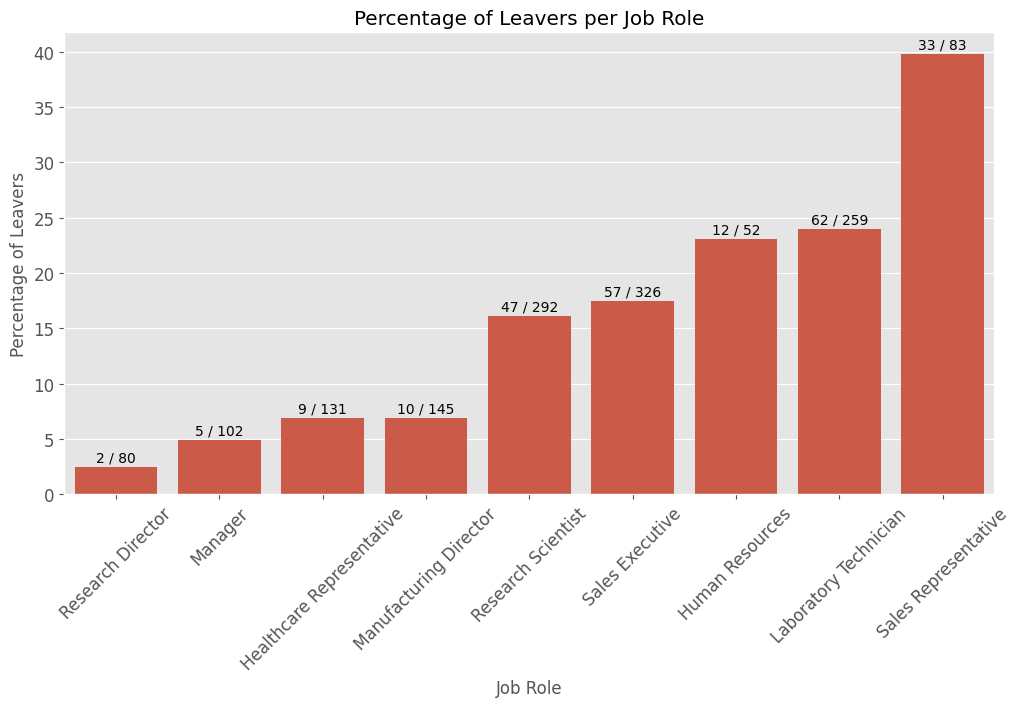

In [42]:
sns.barplot(
    data = job_role_df,
    x = "JobRole",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Job Role")
plt.xticks(rotation = 45)
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Job Role")

for index in range(job_role_df.shape[0]):
    plt.text(x = index, y = job_role_df.loc[index, "LeavingPercentage"] + 0.5, s = job_role_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

Employees who work as **Sales Representative** are more likely to leave with around 40% attrition rate. Coming next are **Laboratory Technicians** and **Human Resoruces**.

#### 3.4.7. `JobLevel`

In [43]:
job_level_df = pd.DataFrame(columns = ["JobLevel", "LeavingPercentage", "Percentage_s"])
for index, job_level in enumerate(visualization_df.JobLevel.unique()):
    job_level_count = visualization_df[visualization_df.JobLevel == job_level].shape[0]
    leaving_count = visualization_df[(visualization_df.JobLevel == job_level) & (visualization_df.Attrition == "Yes")].shape[0]
    job_level_df.loc[index, "JobLevel"] = str(job_level)
    job_level_df.loc[index, "LeavingPercentage"] = leaving_count / job_level_count * 100
    job_level_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, job_level_count)

job_level_df.sort_values("JobLevel", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

job_level_df

JobLevel LeavingPercentage Percentage_s
0        1         26.335175    143 / 543
1        2          9.737828     52 / 534
2        3         14.678899     32 / 218
3        4          4.716981      5 / 106
4        5          7.246377       5 / 69

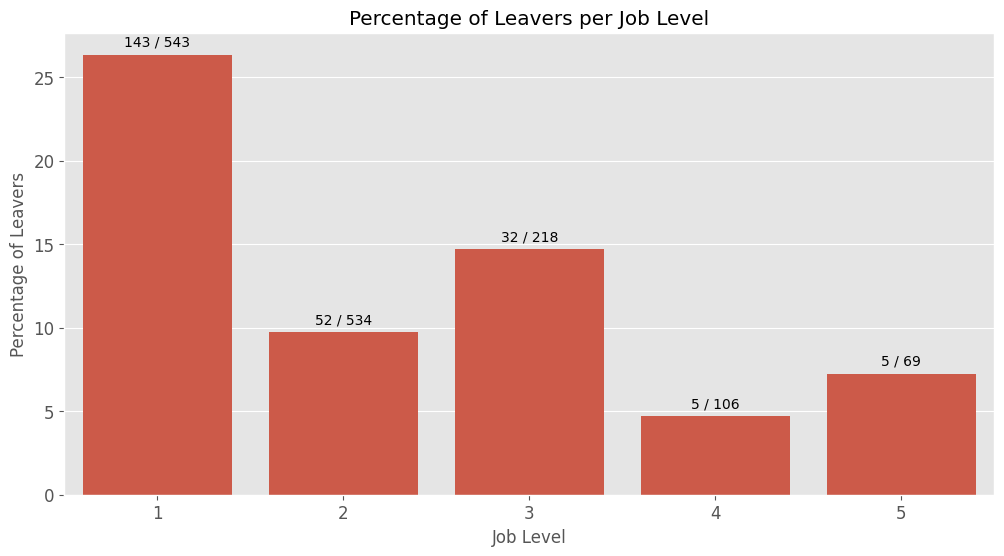

In [44]:
sns.barplot(
    data = job_level_df,
    x = "JobLevel",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Job Level")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Job Level")

for index in range(job_level_df.shape[0]):
    plt.text(x = index, y = job_level_df.loc[index, "LeavingPercentage"] + 0.5, s = job_level_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

Employees with Job Level of 1 are more likely to leave. It is not that inverse relationship as employees of Job Level 3 are more likely than Job Level 2 to leave and same for Job Levels 5 and 4.

#### 3.4.8. `JobInvolevment`

In [45]:
job_involvement_df = pd.DataFrame(columns = ["JobInvolvement", "LeavingPercentage", "Percentage_s"])
for index, job_involvement in enumerate(visualization_df.JobInvolvement.unique()):
    job_involvement_count = visualization_df[visualization_df.JobInvolvement == job_involvement].shape[0]
    leaving_count = visualization_df[(visualization_df.JobInvolvement == job_involvement) & (visualization_df.Attrition == "Yes")].shape[0]
    job_involvement_df.loc[index, "JobInvolvement"] = str(job_involvement)
    job_involvement_df.loc[index, "LeavingPercentage"] = leaving_count / job_involvement_count * 100
    job_involvement_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, job_involvement_count)

job_involvement_df.sort_values("JobInvolvement", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

job_involvement_df

JobInvolvement LeavingPercentage Percentage_s
0              1          33.73494      28 / 83
1              2         18.933333     71 / 375
2              3         14.400922    125 / 868
3              4          9.027778     13 / 144

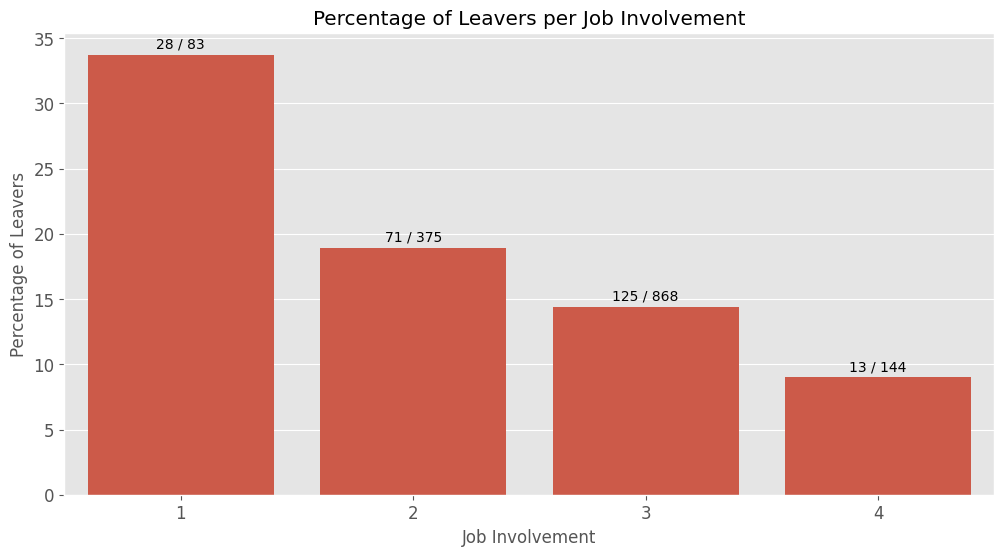

In [46]:
sns.barplot(
    data = job_involvement_df,
    x = "JobInvolvement",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Job Involvement")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Job Involvement")

for index in range(job_involvement_df.shape[0]):
    plt.text(x = index, y = job_involvement_df.loc[index, "LeavingPercentage"] + 0.5, s = job_involvement_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

There is inverse relationship between the job involvement and the attrition rates. The less you are involved in your job/team, the more likely you want to leave.

#### 3.4.9. `WorkLifeBalance`

In [47]:
work_life_balance_df = pd.DataFrame(columns = ["WorkLifeBalance", "LeavingPercentage", "Percentage_s"])
for index, work_life_level in enumerate(visualization_df.WorkLifeBalance.unique()):
    work_life_level_count = visualization_df[visualization_df.WorkLifeBalance == work_life_level].shape[0]
    leaving_count = visualization_df[(visualization_df.WorkLifeBalance == work_life_level) & (visualization_df.Attrition == "Yes")].shape[0]
    work_life_balance_df.loc[index, "WorkLifeBalance"] = str(work_life_level)
    work_life_balance_df.loc[index, "LeavingPercentage"] = leaving_count / work_life_level_count * 100
    work_life_balance_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, work_life_level_count)

work_life_balance_df.sort_values("WorkLifeBalance", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

work_life_balance_df

WorkLifeBalance LeavingPercentage Percentage_s
0               1             31.25      25 / 80
1               2         16.860465     58 / 344
2               3         14.221725    127 / 893
3               4         17.647059     27 / 153

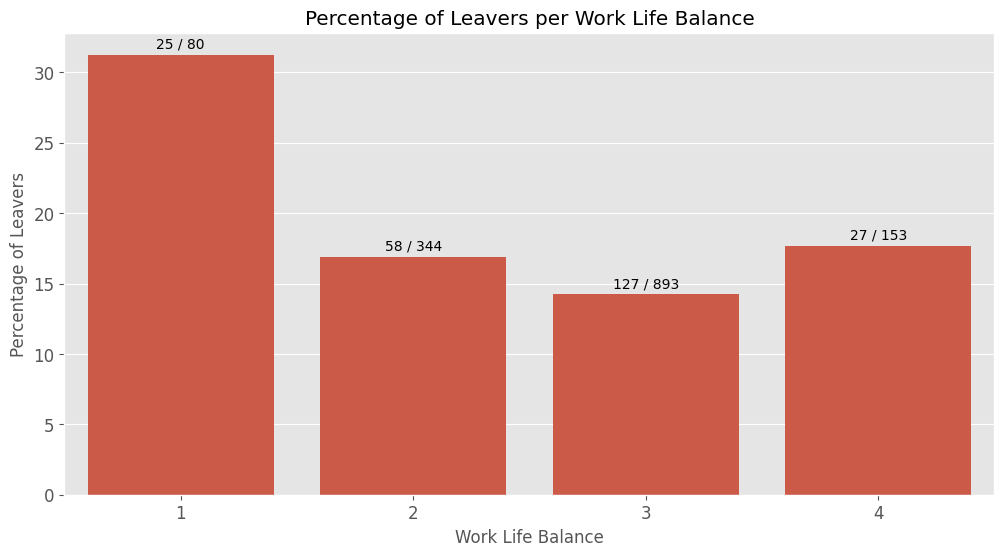

In [48]:
sns.barplot(
    data = work_life_balance_df,
    x = "WorkLifeBalance",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Work Life Balance")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Work Life Balance")

for index in range(work_life_balance_df.shape[0]):
    plt.text(x = index, y = work_life_balance_df.loc[index, "LeavingPercentage"] + 0.5, s = work_life_balance_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

Clearly most of those who have bad work-life balance tend to leave their jobs. The realtionship between the work-life balance and the attrition rates is inverse.

#### 3.4.10. `OverTime`

In [49]:
overtime_df = pd.DataFrame(columns = ["OverTime", "LeavingPercentage", "Percentage_s"])
for index, overtime in enumerate(visualization_df.OverTime.unique()):
    overtime_count = visualization_df[visualization_df.OverTime == overtime].shape[0]
    leaving_count = visualization_df[(visualization_df.OverTime == overtime) & (visualization_df.Attrition == "Yes")].shape[0]
    overtime_df.loc[index, "OverTime"] = str(overtime)
    overtime_df.loc[index, "LeavingPercentage"] = leaving_count / overtime_count * 100
    overtime_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, overtime_count)

overtime_df.sort_values("OverTime", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

overtime_df

OverTime LeavingPercentage Percentage_s
0       No         10.436433   110 / 1054
1      Yes         30.528846    127 / 416

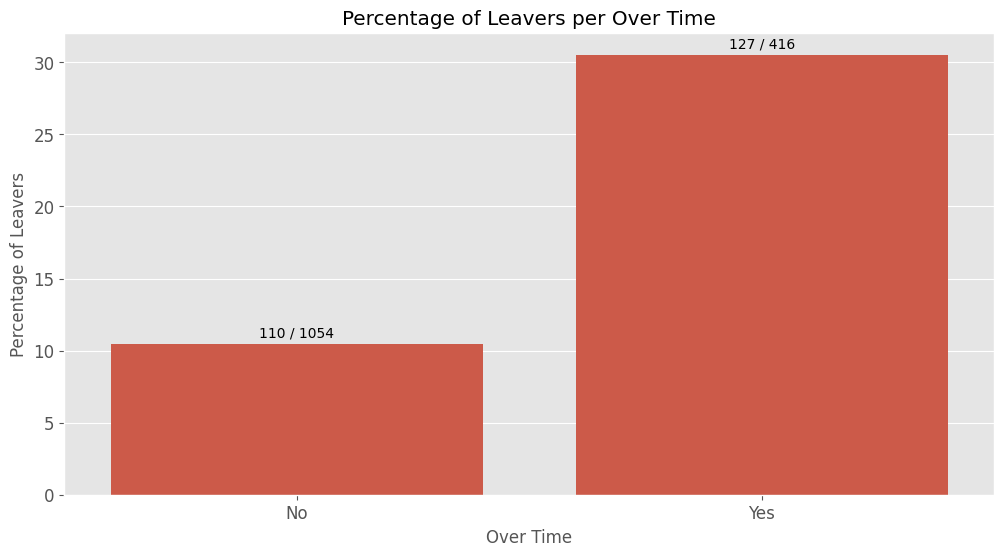

In [50]:
sns.barplot(
    data = overtime_df,
    x = "OverTime",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Over Time")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Over Time")

for index in range(overtime_df.shape[0]):
    plt.text(x = index, y = overtime_df.loc[index, "LeavingPercentage"] + 0.5, s = overtime_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

It's clearly that the leaving rate increases in case of overtime.

#### 3.4.11. `StockOptionLevel`

In [51]:
stock_option_level_df = pd.DataFrame(columns = ["StockOptionLevel", "LeavingPercentage", "Percentage_s"])
for index, stock_level in enumerate(visualization_df.StockOptionLevel.unique()):
    stock_level_count = visualization_df[visualization_df.StockOptionLevel == stock_level].shape[0]
    leaving_count = visualization_df[(visualization_df.StockOptionLevel == stock_level) & (visualization_df.Attrition == "Yes")].shape[0]
    stock_option_level_df.loc[index, "StockOptionLevel"] = str(stock_level)
    stock_option_level_df.loc[index, "LeavingPercentage"] = leaving_count / stock_level_count * 100
    stock_option_level_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, stock_level_count)

stock_option_level_df.sort_values("StockOptionLevel", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

stock_option_level_df

StockOptionLevel LeavingPercentage Percentage_s
0                0         24.405705    154 / 631
1                1          9.395973     56 / 596
2                2          7.594937     12 / 158
3                3         17.647059      15 / 85

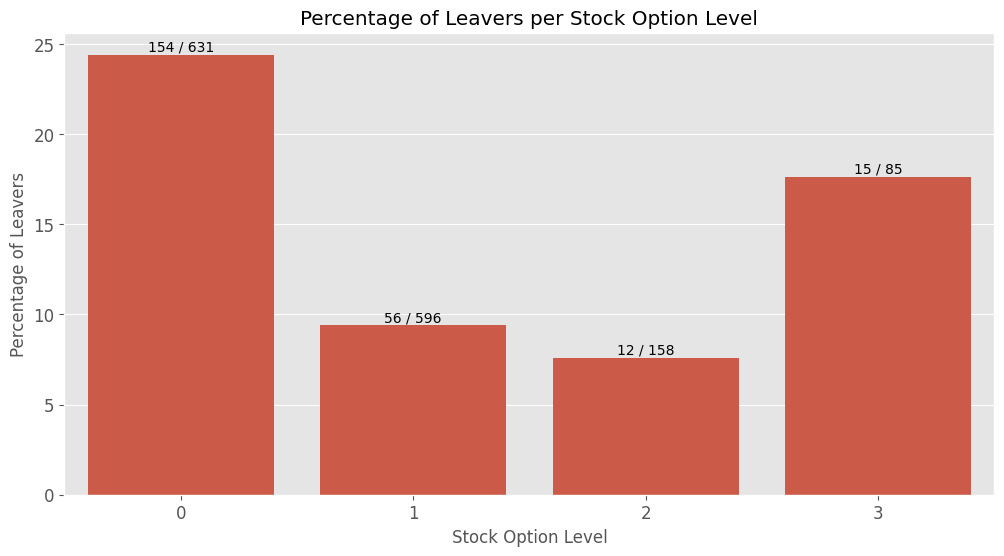

In [52]:
sns.barplot(
    data = stock_option_level_df,
    x = "StockOptionLevel",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Stock Option Level")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Stock Option Level")

for index in range(stock_option_level_df.shape[0]):
    plt.text(x = index, y = stock_option_level_df.loc[index, "LeavingPercentage"] + 0.2, s = stock_option_level_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

#### 3.4.12. `EnvironmentSatisfaction`

In [53]:
environment_satisfaction_df = pd.DataFrame(columns = ["EnvironmentSatisfaction", "LeavingPercentage", "Percentage_s"])
for index, environment_satisfaction_level in enumerate(visualization_df.EnvironmentSatisfaction.unique()):
    environment_satisfaction_count = visualization_df[visualization_df.EnvironmentSatisfaction == environment_satisfaction_level].shape[0]
    leaving_count = visualization_df[(visualization_df.EnvironmentSatisfaction == environment_satisfaction_level) & (visualization_df.Attrition == "Yes")].shape[0]
    environment_satisfaction_df.loc[index, "EnvironmentSatisfaction"] = str(environment_satisfaction_level)
    environment_satisfaction_df.loc[index, "LeavingPercentage"] = leaving_count / environment_satisfaction_count * 100
    environment_satisfaction_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, environment_satisfaction_count)

environment_satisfaction_df.sort_values("EnvironmentSatisfaction", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

environment_satisfaction_df

EnvironmentSatisfaction LeavingPercentage Percentage_s
0                       1         25.352113     72 / 284
1                       2         14.982578     43 / 287
2                       3         13.686534     62 / 453
3                       4         13.452915     60 / 446

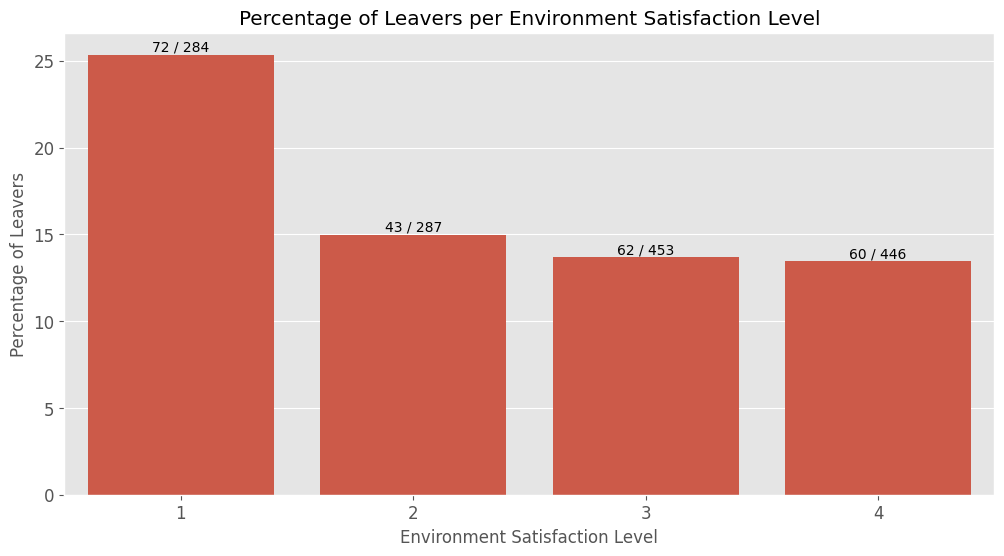

In [54]:
sns.barplot(
    data = environment_satisfaction_df,
    x = "EnvironmentSatisfaction",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Environment Satisfaction Level")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Environment Satisfaction Level")

for index in range(environment_satisfaction_df.shape[0]):
    plt.text(x = index, y = environment_satisfaction_df.loc[index, "LeavingPercentage"] + 0.2, s = environment_satisfaction_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

We can see that the relationship between the environment satisfaction level and the attrition rates is an inverse relationship. The less the employee is satisfied with their environment, the more likely they decide to leave.

#### 3.4.13. `RelationshipSatisfaction`

In [55]:
relationship_satisfaction_df = pd.DataFrame(columns = ["RelationshipSatisfaction", "LeavingPercentage", "Percentage_s"])
for index, relationship_satisfaction_level in enumerate(visualization_df.RelationshipSatisfaction.unique()):
    relationship_satisfaction_count = visualization_df[visualization_df.RelationshipSatisfaction == relationship_satisfaction_level].shape[0]
    leaving_count = visualization_df[(visualization_df.RelationshipSatisfaction == relationship_satisfaction_level) & (visualization_df.Attrition == "Yes")].shape[0]
    relationship_satisfaction_df.loc[index, "RelationshipSatisfaction"] = str(relationship_satisfaction_level)
    relationship_satisfaction_df.loc[index, "LeavingPercentage"] = leaving_count / relationship_satisfaction_count * 100
    relationship_satisfaction_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, relationship_satisfaction_count)

relationship_satisfaction_df.sort_values("RelationshipSatisfaction", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

relationship_satisfaction_df

RelationshipSatisfaction LeavingPercentage Percentage_s
0                        1         20.652174     57 / 276
1                        2         14.851485     45 / 303
2                        3          15.46841     71 / 459
3                        4         14.814815     64 / 432

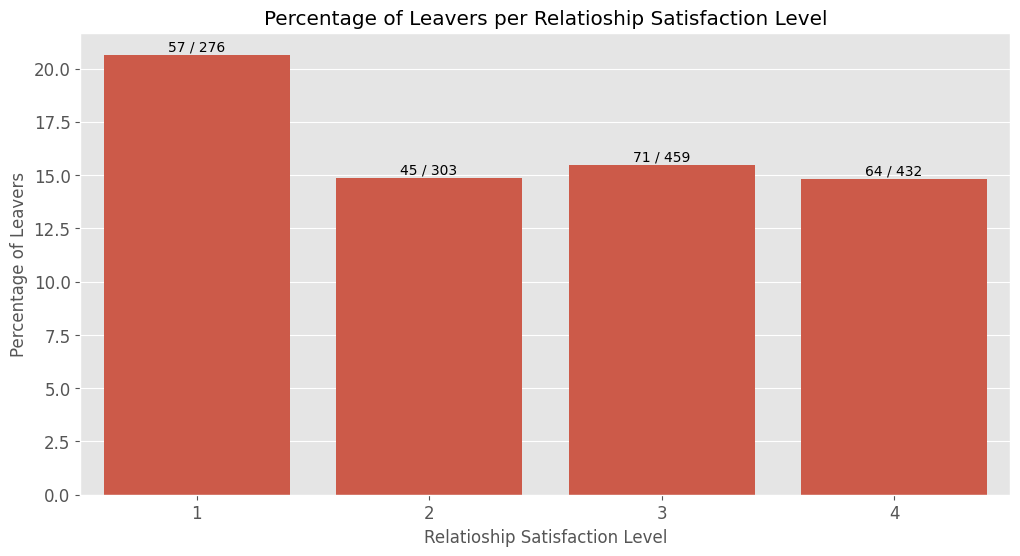

In [56]:
sns.barplot(
    data = relationship_satisfaction_df,
    x = "RelationshipSatisfaction",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Relatioship Satisfaction Level")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Relatioship Satisfaction Level")

for index in range(relationship_satisfaction_df.shape[0]):
    plt.text(x = index, y = relationship_satisfaction_df.loc[index, "LeavingPercentage"] + 0.2, s = relationship_satisfaction_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

The highest attrition rates are for the employees who has level-1 in their relationship satisfaction. For the remaining levels, it's quite similar.

#### 3.4.14. `JobSatisfaction`

In [57]:
job_satisfaction_df = pd.DataFrame(columns = ["JobSatisfaction", "LeavingPercentage", "Percentage_s"])
for index, job_satisfaction_level in enumerate(visualization_df.JobSatisfaction.unique()):
    job_satisfaction_count = visualization_df[visualization_df.JobSatisfaction == job_satisfaction_level].shape[0]
    leaving_count = visualization_df[(visualization_df.JobSatisfaction == job_satisfaction_level) & (visualization_df.Attrition == "Yes")].shape[0]
    job_satisfaction_df.loc[index, "JobSatisfaction"] = str(job_satisfaction_level)
    job_satisfaction_df.loc[index, "LeavingPercentage"] = leaving_count / job_satisfaction_count * 100
    job_satisfaction_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, job_satisfaction_count)

job_satisfaction_df.sort_values("JobSatisfaction", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

job_satisfaction_df

JobSatisfaction LeavingPercentage Percentage_s
0               1          22.83737     66 / 289
1               2         16.428571     46 / 280
2               3         16.515837     73 / 442
3               4         11.328976     52 / 459

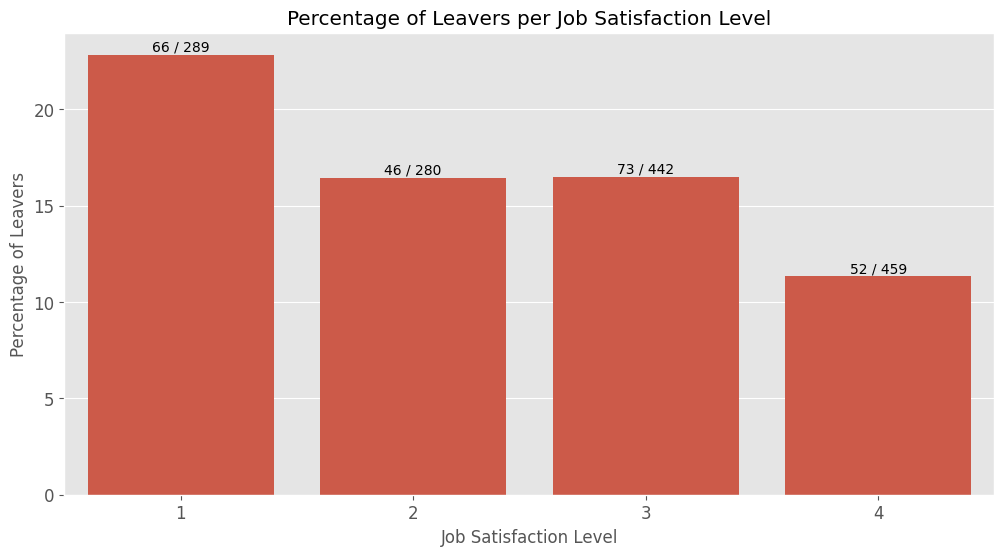

In [58]:
sns.barplot(
    data = job_satisfaction_df,
    x = "JobSatisfaction",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Job Satisfaction Level")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Job Satisfaction Level")

for index in range(job_satisfaction_df.shape[0]):
    plt.text(x = index, y = job_satisfaction_df.loc[index, "LeavingPercentage"] + 0.2, s = job_satisfaction_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

We can see that the relationship between the job satisfaction level and the attrition rates is an inverse relationship. The less the employee is satisfied with their job, the more likely they decide to leave.

#### 3.4.15. `PerformanceRating`

In [59]:
performance_rating_df = pd.DataFrame(columns = ["PerformanceRating", "LeavingPercentage", "Percentage_s"])
for index, performance_rating in enumerate(visualization_df.PerformanceRating.unique()):
    performance_rating_count = visualization_df[visualization_df.PerformanceRating == performance_rating].shape[0]
    leaving_count = visualization_df[(visualization_df.PerformanceRating == performance_rating) & (visualization_df.Attrition == "Yes")].shape[0]
    performance_rating_df.loc[index, "PerformanceRating"] = str(performance_rating)
    performance_rating_df.loc[index, "LeavingPercentage"] = leaving_count / performance_rating_count * 100
    performance_rating_df.loc[index, "Percentage_s"] = "{} / {}".format(leaving_count, performance_rating_count)

performance_rating_df.sort_values("PerformanceRating", inplace = True, ignore_index = True) # this is an ordinal categorical feature...

performance_rating_df

PerformanceRating LeavingPercentage Percentage_s
0                 3          16.07717   200 / 1244
1                 4         16.371681     37 / 226

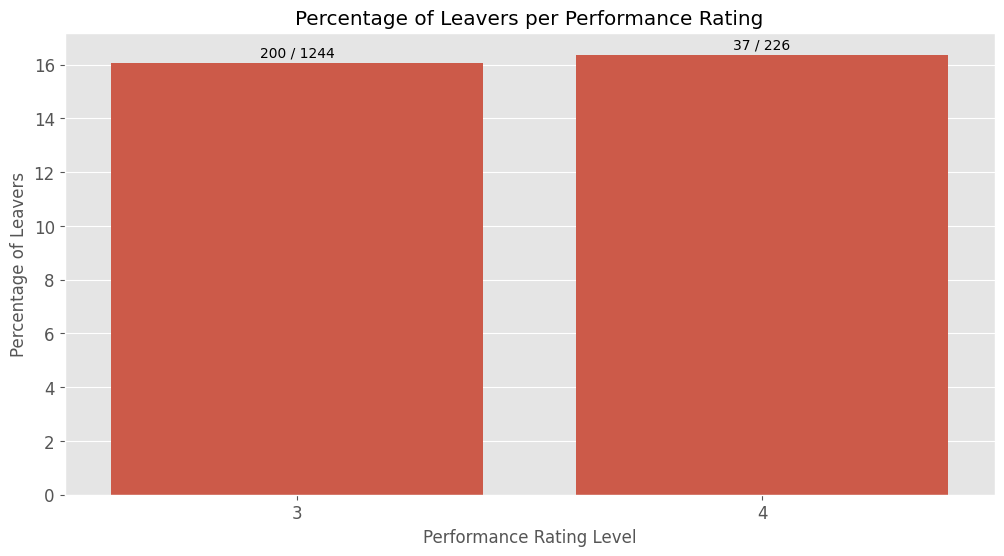

In [60]:
sns.barplot(
    data = performance_rating_df,
    x = "PerformanceRating",
    y = "LeavingPercentage",
    color = sns.color_palette()[0]
)

plt.xlabel("Performance Rating Level")
plt.ylabel("Percentage of Leavers")
plt.title("Percentage of Leavers per Performance Rating")

for index in range(performance_rating_df.shape[0]):
    plt.text(x = index, y = performance_rating_df.loc[index, "LeavingPercentage"] + 0.2, s = performance_rating_df.loc[index, "Percentage_s"], ha = "center")

plt.show()

Performance rating should be encoded from 1-4, but the data only shows ratings 3 and 4 which are the best ratings. So it may seem that no employee recieved a bad rating that would make them leave his job.

### 3.5. Target Visualization

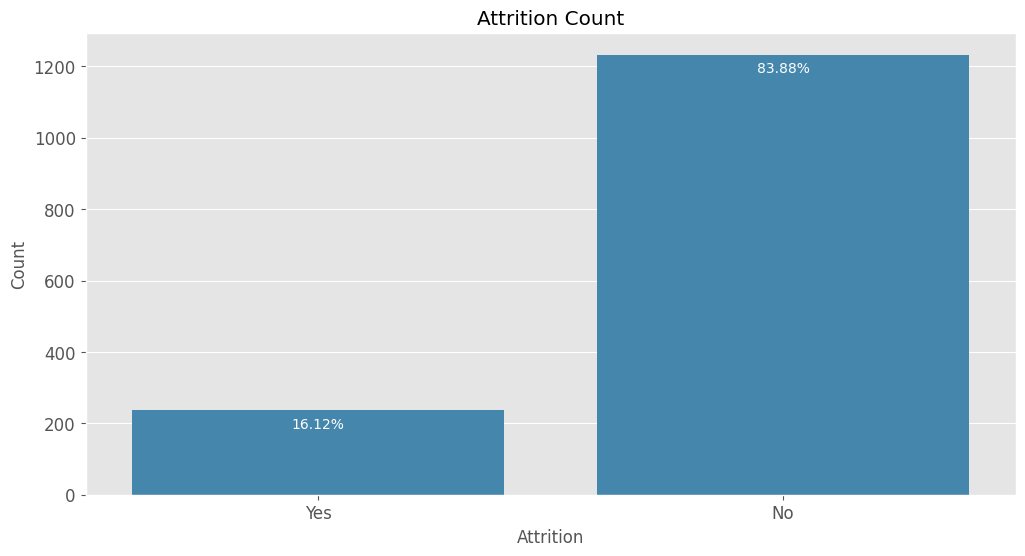

In [61]:
sns.countplot(
    data = visualization_df,
    x = "Attrition",
    color = sns.color_palette()[1]
)
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.title("Attrition Count")

for index, attrition in enumerate(visualization_df.Attrition.unique()):
    count = visualization_df.Attrition.value_counts()[attrition]
    percentage = count / visualization_df.shape[0] * 100
    plt.text(x = index, y = count - 20, s = "{:.2f}%".format(percentage), c = "white", ha = "center", va = "top")

plt.show()

We can see that there is a huge imbalance between the attrition labels with 84% of the employees stayed.

## 4. Feature Engineering

In [62]:
fe_df = original_data.copy()
fe_df["Attrition"] = fe_df["Attrition"].map({"Yes":1, "No":0})

### 4.1. Features Groupping

In [63]:
all_features = list(fe_df.columns)

numeric_features = list(fe_df.select_dtypes([np.int32, np.int64, np.float32, np.float64]).columns)
# numeric_features includes both numeric features and numeric-encoded ordinal categorical features

ordinal_categorical_features = ["Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction",
                                "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance", "StockOptionLevel"]

target = ["Attrition"]

numeric_features = list(set(numeric_features) - set(ordinal_categorical_features) - set(target))
# now, numeric_features contains only the numeric features

nominal_categorical_features = list( set(all_features) - set(numeric_features) - set(ordinal_categorical_features) - set(target) )

print("Total number of features is", len (all_features))
print("Number of numeric features is", len(numeric_features), "and they are", numeric_features)
print("Number of ordinal categorical features is", len(ordinal_categorical_features), "and they are", ordinal_categorical_features)
print("Number of nominal categorical features is", len(nominal_categorical_features), "and they are", nominal_categorical_features)

Total number of features is 32
Number of numeric features is 14 and they are ['TrainingTimesLastYear', 'YearsAtCompany', 'NumCompaniesWorked', 'YearsInCurrentRole', 'MonthlyRate', 'Age', 'YearsSinceLastPromotion', 'HourlyRate', 'DailyRate', 'MonthlyIncome', 'YearsWithCurrManager', 'DistanceFromHome', 'TotalWorkingYears', 'PercentSalaryHike']
Number of ordinal categorical features is 9 and they are ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'StockOptionLevel']
Number of nominal categorical features is 8 and they are ['EducationField', 'Department', 'MaritalStatus', 'JobRole', 'Gender', 'OverTime', 'BusinessTravel', 'Over18']


### 4.2. Correlation between Numerical Feautres

<AxesSubplot:>

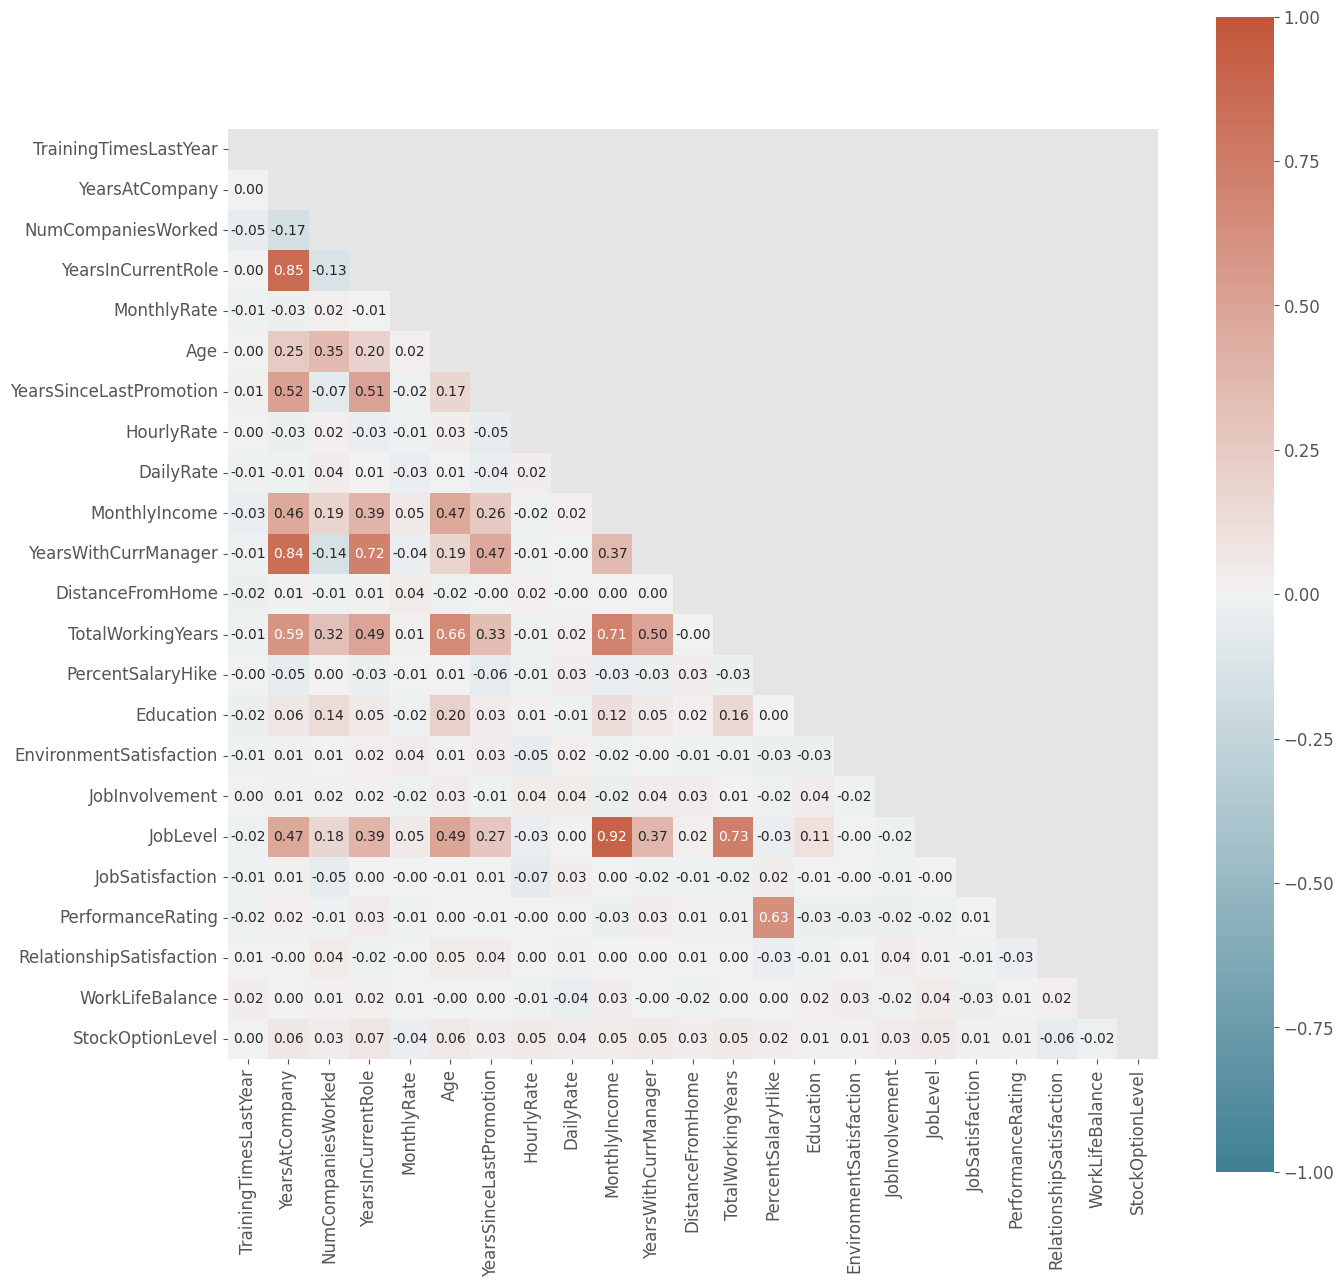

In [64]:
ordinal_features = numeric_features + ordinal_categorical_features

corr_matrix = fe_df[ordinal_features].corr(method = "spearman")

heatmap_cmap = sns.diverging_palette(220, 20,  as_cmap=True)
heatmap_mask = np.triu(np.ones_like(corr_matrix), k = 0)

plt.figure(figsize = (15, 15))
sns.heatmap(
    corr_matrix,
    cmap = heatmap_cmap,
    square = True,
    annot = True,
    fmt = ".2f",
    mask = heatmap_mask,
    vmin = -1,
    vmax = 1
)

We notice from the above heatmap that there are some strong correlations between some features:
* `YearsAtCompany` and `YearsWithCurrManager`
* `YearsAtCompany` and `YearsInCurrentRole`
* `MonthlyIncome` and `JobLevel`

We can detect these features [`YearsAtCompany`, `MonthlyIncome`] automatically by executing the following:

In [65]:
upper_corr = corr_matrix.where(~(heatmap_mask.astype(bool)))
columns_to_drop = [col for col in upper_corr.columns if any(upper_corr[col] > 0.8)]
columns_to_drop

['YearsAtCompany', 'MonthlyIncome']

Now, we can drop them.

In [66]:
for col in columns_to_drop:
    numeric_features.remove(col)

In [67]:
fe_df.drop(columns = columns_to_drop, inplace = True)

<AxesSubplot:>

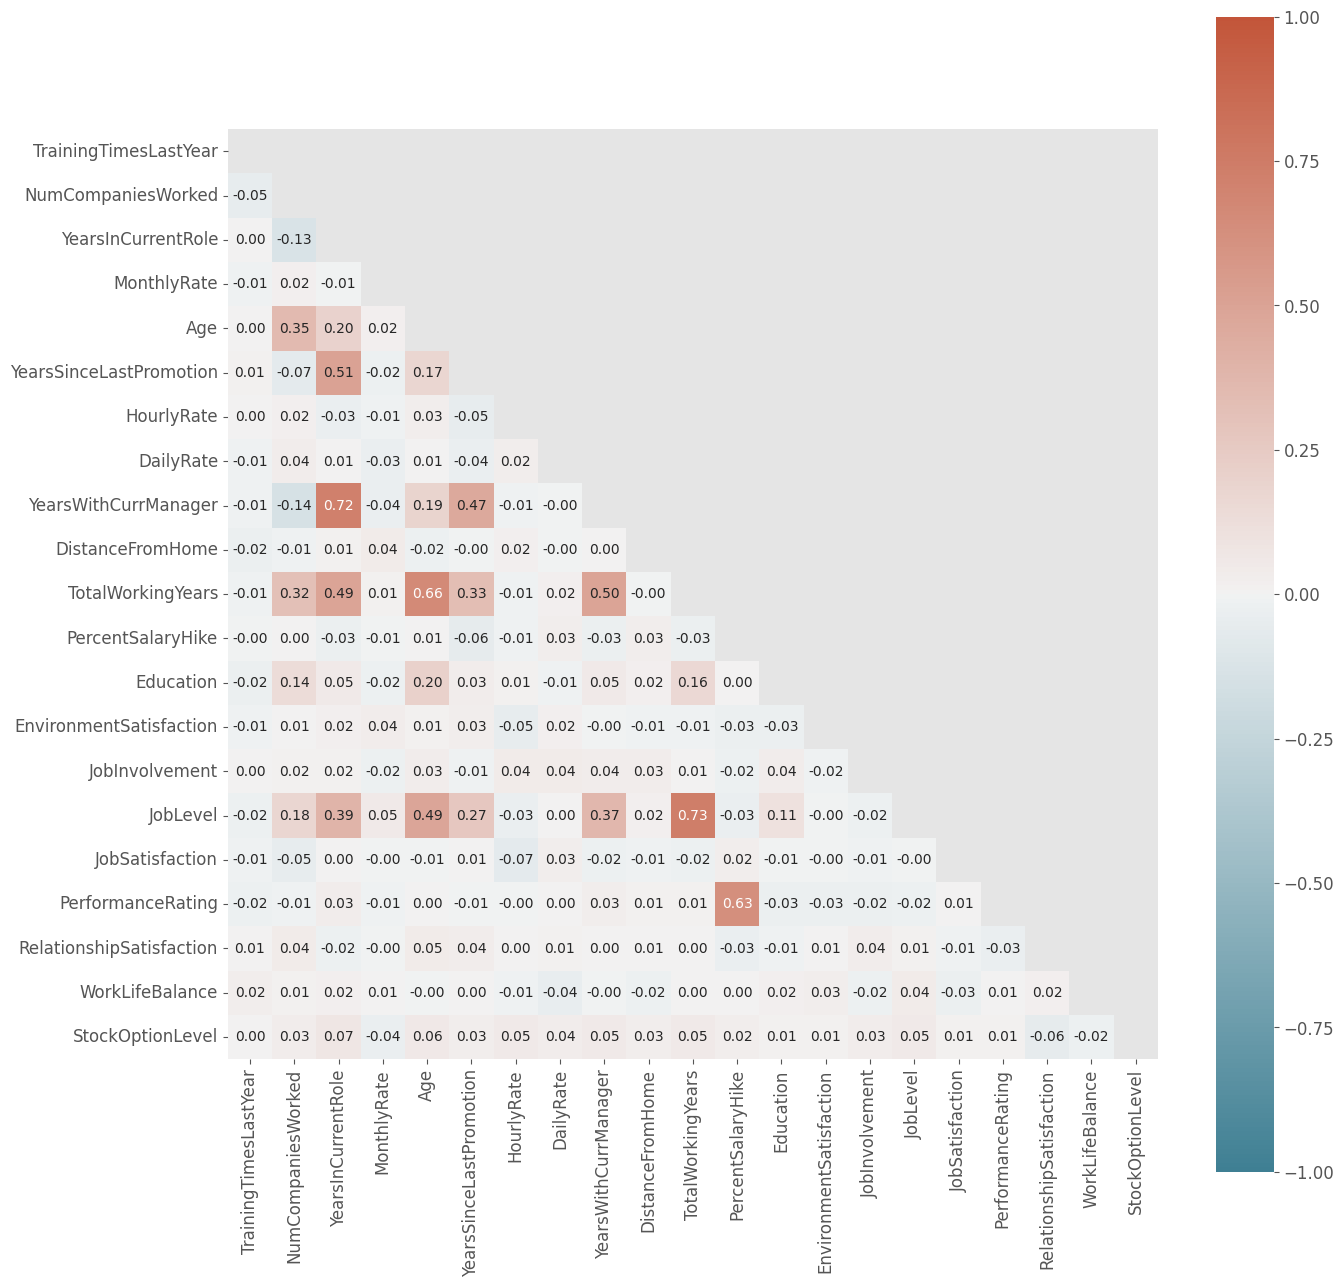

In [68]:
ordinal_features = numeric_features + ordinal_categorical_features

corr_matrix = fe_df[ordinal_features].corr(method = "spearman")

heatmap_cmap = sns.diverging_palette(220, 20,  as_cmap=True)
heatmap_mask = np.triu(np.ones_like(corr_matrix), k = 0)

plt.figure(figsize = (15, 15))
sns.heatmap(
    corr_matrix,
    cmap = heatmap_cmap,
    square = True,
    annot = True,
    fmt = ".2f",
    mask = heatmap_mask,
    vmin = -1,
    vmax = 1
)

### 4.3. Correlation between Numeric Features and Target

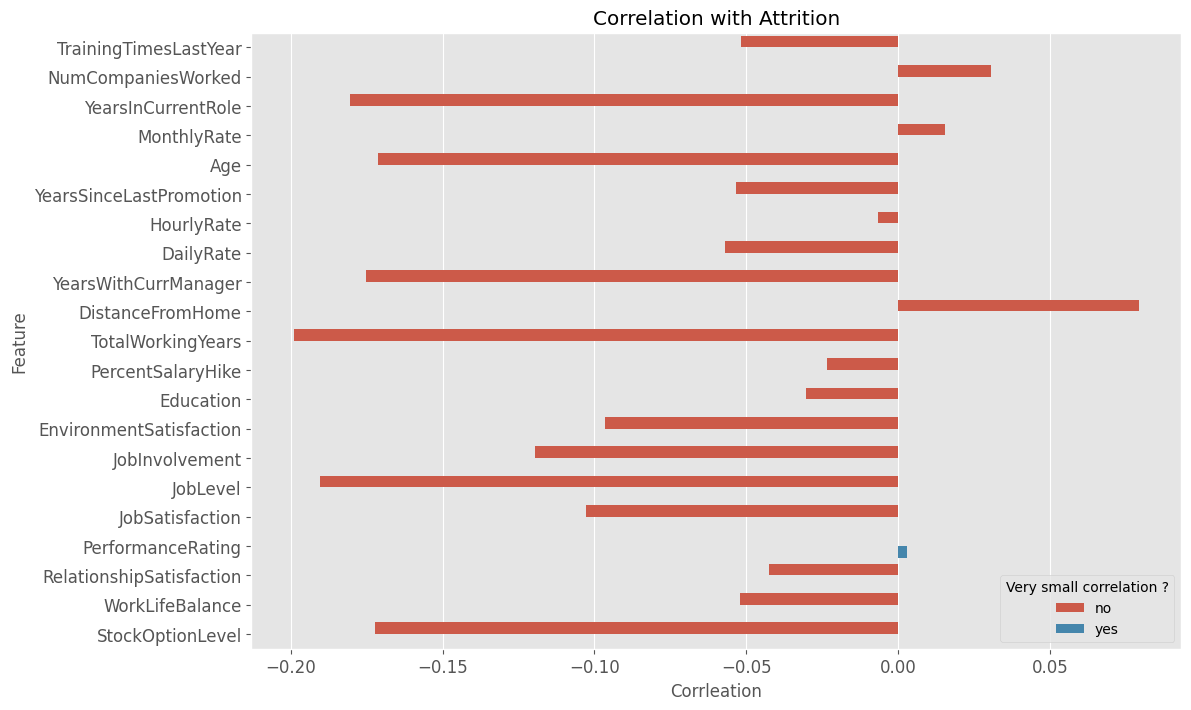

In [69]:
ordinal_features = numeric_features + ordinal_categorical_features
corr_num_with_target = pd.DataFrame(fe_df[ordinal_features].corrwith(fe_df.Attrition, method = "spearman"), columns = ["correlation"]).reset_index()
corr_num_with_target["highlight"] = corr_num_with_target.correlation.apply(lambda corr : "yes" if abs(corr) <= 0.005 else "no")

plt.figure(figsize=(12, 8))
plt.grid(True, axis = "both")
sns.barplot(
    data = corr_num_with_target,
    y = "index",
    x = "correlation",
    hue = "highlight"
)
plt.ylabel("Feature")
plt.xlabel("Corrleation")
plt.title("Correlation with Attrition")
plt.legend(title = "Very small correlation ?", loc = 4)
plt.show()

As we noticed eariler, `PerfomanceRating` doesn't highly correlate with the target. Thus should be removed.

In [70]:
ordinal_categorical_features.remove("PerformanceRating")
fe_df.drop(columns = ["PerformanceRating"], inplace = True)

### 4.4. Correlation between Categorical Features and Target

In [71]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder

In [72]:
nominal_categorical_df = fe_df[nominal_categorical_features].copy()
nominal_categorical_df.head()

EducationField              Department MaritalStatus                JobRole  \
0  Life Sciences                   Sales        Single        Sales Executive   
1  Life Sciences  Research & Development       Married     Research Scientist   
2          Other  Research & Development        Single  Laboratory Technician   
3  Life Sciences  Research & Development       Married     Research Scientist   
4        Medical  Research & Development       Married  Laboratory Technician   

   Gender OverTime     BusinessTravel Over18  
0  Female      Yes      Travel_Rarely      Y  
1    Male       No  Travel_Frequently      Y  
2    Male      Yes      Travel_Rarely      Y  
3  Female      Yes  Travel_Frequently      Y  
4    Male       No      Travel_Rarely      Y

In [73]:
oe = OrdinalEncoder()
nominal_categorical_encoded_df = oe.fit_transform(nominal_categorical_df)
nominal_categorical_encoded_df = pd.DataFrame(nominal_categorical_encoded_df, columns = nominal_categorical_df.columns)
nominal_categorical_encoded_df.head()

EducationField  Department  MaritalStatus  JobRole  Gender  OverTime  \
0             1.0         2.0            2.0      7.0     0.0       1.0   
1             1.0         1.0            1.0      6.0     1.0       0.0   
2             4.0         1.0            2.0      2.0     1.0       1.0   
3             1.0         1.0            1.0      6.0     0.0       1.0   
4             3.0         1.0            1.0      2.0     1.0       0.0   

   BusinessTravel  Over18  
0             2.0     0.0  
1             1.0     0.0  
2             2.0     0.0  
3             1.0     0.0  
4             2.0     0.0

In [74]:
sk = SelectKBest(score_func = chi2, k = "all")
X_categorical = nominal_categorical_encoded_df.values
y = fe_df.Attrition
sk.fit(X_categorical, y)
sk.scores_

array([8.34911631e-01, 1.32929732e+00, 1.87456575e+01, 9.00444847e+00,
       5.10086544e-01, 6.38450667e+01, 2.20269350e-06,            nan])

We can see that `Over18` has a single unique value `Y`. So, it should be removed.

In [75]:
nominal_categorical_features.remove("Over18")

In [76]:
fe_df.drop(columns = ["Over18"], inplace = True)

Also, according to chi-2, the target isn't dependent on `BusinessTravel` but I decided to keep it as from its visualization, it gave meaningful insights about the relationship between it and the target. 

In [77]:
columns_dropped_during_fe = list(set(original_data.columns) - set(fe_df.columns))
columns_dropped_during_fe

['MonthlyIncome', 'YearsAtCompany', 'PerformanceRating', 'Over18']

## 5. Modelling

For machine learning modelling, I will try to focus on 2 things:
* Get each feature contribution (i.e., coefficient, importance) for some models
* Focus on the recall as we should try to minimize ***false negatives*** (i.e., predict an employee will stay when he is actually leaving).

In [359]:
ml_df = original_data.copy().drop(columns=columns_dropped_during_fe)
ml_df.Attrition = ml_df.Attrition.map({"Yes":1, "No":0})

In [360]:
for numeric_feature in numeric_features:
    if ml_df[numeric_feature].skew() > 0.75:
        ml_df[numeric_feature] = np.log1p(ml_df[numeric_feature])

In [361]:
for nominal_categorical_feature in nominal_categorical_features:
    categorical_dummies = pd.get_dummies(ml_df[nominal_categorical_feature], prefix = "NOM_{}".format(nominal_categorical_feature), drop_first = True)
    ml_df = pd.concat([ml_df, categorical_dummies], axis = 1)

ml_df.drop(columns = nominal_categorical_features, inplace = True)
ml_df.columns = ml_df.columns.str.replace(" ", "")
ml_df.head().T

0             1            2  \
Age                                      41.000000     49.000000    37.000000   
Attrition                                 1.000000      0.000000     1.000000   
DailyRate                              1102.000000    279.000000  1373.000000   
DistanceFromHome                          0.693147      2.197225     1.098612   
Education                                 2.000000      1.000000     2.000000   
EnvironmentSatisfaction                   2.000000      3.000000     4.000000   
HourlyRate                               94.000000     61.000000    92.000000   
JobInvolvement                            3.000000      2.000000     2.000000   
JobLevel                                  2.000000      2.000000     1.000000   
JobSatisfaction                           4.000000      2.000000     3.000000   
MonthlyRate                           19479.000000  24907.000000  2396.000000   
NumCompaniesWorked                        2.197225      0.693147     1.945910   
PercentSalaryHike                         2.484907      3.178054     2.772589   
RelationshipSatisfaction                  1.000000      4.000000     2.000000   
StockOptionLevel                          0.000000      1.000000     0.000000   
TotalWorkingYears                         2.197225      2.397895     2.079442   
TrainingTimesLastYear                     0.000000      3.000000     3.000000   
WorkLifeBalance                           1.000000      3.000000     3.000000   
YearsInCurrentRole                        1.609438      2.079442     0.000000   
YearsSinceLastPromotion                   0.000000      0.693147     0.000000   
YearsWithCurrManager                      1.791759      2.079442     0.000000   
NOM_EducationField_LifeSciences           1.000000      1.000000     0.000000   
NOM_EducationField_Marketing              0.000000      0.000000     0.000000   
NOM_EducationField_Medical                0.000000      0.000000     0.000000   
NOM_EducationField_Other                  0.000000      0.000000     1.000000   
NOM_EducationField_TechnicalDegree        0.000000      0.000000     0.000000   
NOM_Department_Research&Development       0.000000      1.000000     1.000000   
NOM_Department_Sales                      1.000000      0.000000     0.000000   
NOM_MaritalStatus_Married                 0.000000      1.000000     0.000000   
NOM_MaritalStatus_Single                  1.000000      0.000000     1.000000   
NOM_JobRole_HumanResources                0.000000      0.000000     0.000000   
NOM_JobRole_LaboratoryTechnician          0.000000      0.000000     1.000000   
NOM_JobRole_Manager                       0.000000      0.000000     0.000000   
NOM_JobRole_ManufacturingDirector         0.000000      0.000000     0.000000   
NOM_JobRole_ResearchDirector              0.000000      0.000000     0.000000   
NOM_JobRole_ResearchScientist             0.000000      1.000000     0.000000   
NOM_JobRole_SalesExecutive                1.000000      0.000000     0.000000   
NOM_JobRole_SalesRepresentative           0.000000      0.000000     0.000000   
NOM_Gender_Male                           0.000000      1.000000     1.000000   
NOM_OverTime_Yes                          1.000000      0.000000     1.000000   
NOM_BusinessTravel_Travel_Frequently      0.000000      1.000000     0.000000   
NOM_BusinessTravel_Travel_Rarely          1.000000      0.000000     1.000000   

                                                 3             4  
Age                                      33.000000     27.000000  
Attrition                                 0.000000      0.000000  
DailyRate                              1392.000000    591.000000  
DistanceFromHome                          1.386294      1.098612  
Education                                 4.000000      1.000000  
EnvironmentSatisfaction                   4.000000      1.000000  
HourlyRate                               56.000000     40.000000  
JobInvolvement               

In [362]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [363]:
X = ml_df.drop(columns=["Attrition"])
y = ml_df.Attrition

In [364]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [365]:
scaler = StandardScaler()
X_train[numeric_features] = scaler.fit_transform(X_train[numeric_features])
X_test[numeric_features] = scaler.transform(X_test[numeric_features])

In our training, and also test because we used stratified splitting, there is imbalance between the 2 classes of the target.

In [366]:
y_train.value_counts() * 100 / y_train.value_counts().sum()

0    83.867833
1    16.132167
Name: Attrition, dtype: float64

In [367]:
y_test.value_counts() * 100 / y_test.value_counts().sum()

0    83.900227
1    16.099773
Name: Attrition, dtype: float64

If we predicted that any employee will stay, we will have a train, and again also a test, accuracy of 84%. Which is numerically is a good value, however, we will predict any employee leaving. Predicting that employee will leave is much more important.

In [368]:
def get_model_feature_importances(data, model, coef = False):
    fi_df = pd.DataFrame()
    fi_df["feature"] = data.columns
    sort_col = None
    if not coef:
        fi_df["importance"] = model.feature_importances_
    else:
        fi_df["importance"] = model.coef_.ravel()
    
    importances_sum = fi_df["importance"].apply(abs).sum()
    fi_df["normalized_importance"] = fi_df["importance"].apply(abs) / importances_sum * 100
    fi_df.sort_values("importance", ascending = False, ignore_index = True, inplace = True)
    return fi_df

In [369]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, recall_score, precision_score

def evaluate_model(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print("==========TRAINING RESULTS===========")
    train_report_df = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred)}")
    print(f"Precision: {precision_score(y_train, y_train_pred)}")
    print(f"Recall: {recall_score(y_train, y_train_pred)}")
    print(f"Classification Report:\n{train_report_df}")
    
    print("\n==========TESTING  RESULTS===========")
    test_report_df = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred)}")
    print(f"Precision: {precision_score(y_test, y_test_pred)}")
    print(f"Recall: {recall_score(y_test, y_test_pred)}")
    print(f"Classification Report:\n{test_report_df}")

In [370]:
from sklearn.metrics import precision_recall_curve, roc_curve

def plot_precision_recall_curve(model, X, y):
    y_prob = model.predict_proba(X)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y, y_prob)
    fpr, tpr, thresholds_ = roc_curve(y, y_prob)
    gmeans = np.sqrt(tpr * (1 - fpr))
    idx = np.argmax(gmeans)
    best_threshold = thresholds_[idx]
    
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label = "Recall")
    plt.axvline(x = best_threshold, label = "Best Threshold", color='red', linestyle='dotted')
    plt.xlabel("Thresholds")
    plt.legend()
    plt.title("Precision/Recall Tradeoff")
    
def plot_roc_curve(model, X, y):
    y_prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    
    gmeans = np.sqrt(tpr * (1 - fpr))
    idx = np.argmax(gmeans)
    best_threshold = thresholds[idx]
    
    plt.plot(fpr, tpr, linewidth = 2)
    plt.annotate("Best Threshold: {:.2f}".format(best_threshold), xy=(fpr[idx], tpr[idx]), xytext=(fpr[idx], tpr[idx] + 0.1), arrowprops=dict(arrowstyle="->", color = "black"), fontsize = 8, ha = "center")
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve for {} with Area of {:.2f}".format(model.__class__.__name__, roc_auc_score(y, y_prob)), fontsize = 10)

### 5.1. Logistic Regression

In [371]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 42)
logistic_regression_model.fit(X_train, y_train)
evaluate_model(logistic_regression_model, X_train, X_test, y_train, y_test)

==========TRAINING RESULTS===========
Confusion Matrix:
[[843  20]
 [ 83  83]]
Accuracy: 0.8999028182701652
Precision: 0.8058252427184466
Recall: 0.5
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.910367    0.805825  0.899903     0.858096      0.893502
recall       0.976825    0.500000  0.899903     0.738413      0.899903
f1-score     0.942426    0.617100  0.899903     0.779763      0.889944
support    863.000000  166.000000  0.899903  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[359  11]
 [ 46  25]]
Accuracy: 0.8707482993197279
Precision: 0.6944444444444444
Recall: 0.352112676056338
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886420   0.694444  0.870748    0.790432      0.855512
recall       0.970270   0.352113  0.870748    0.661191      0.870748
f1-score     0.926452   0.467290  0.870748    0.696871      0.852528
support 

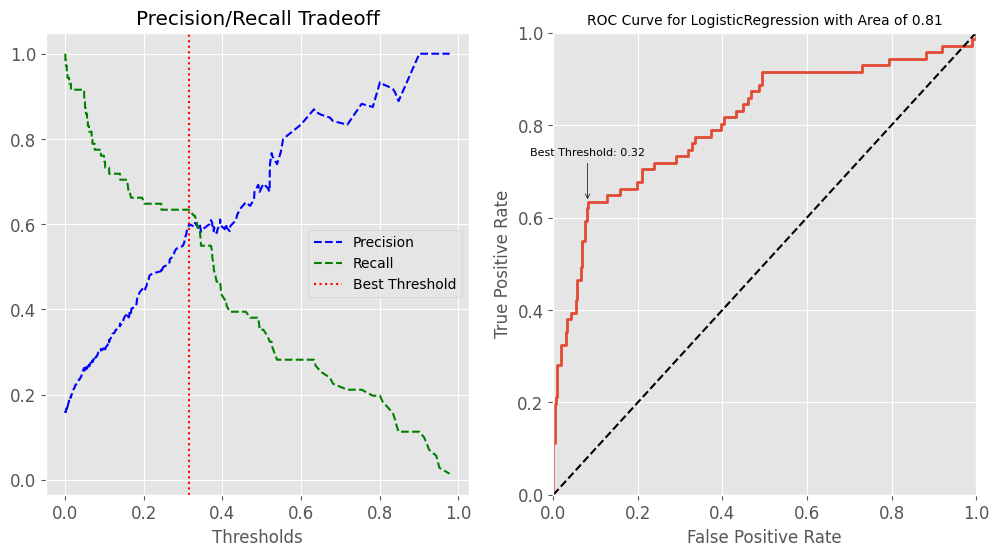

In [372]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(logistic_regression_model, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(logistic_regression_model, X_test, y_test)

Text(0.5, 1.0, 'Normalized Coefficient (%) for each Feature')

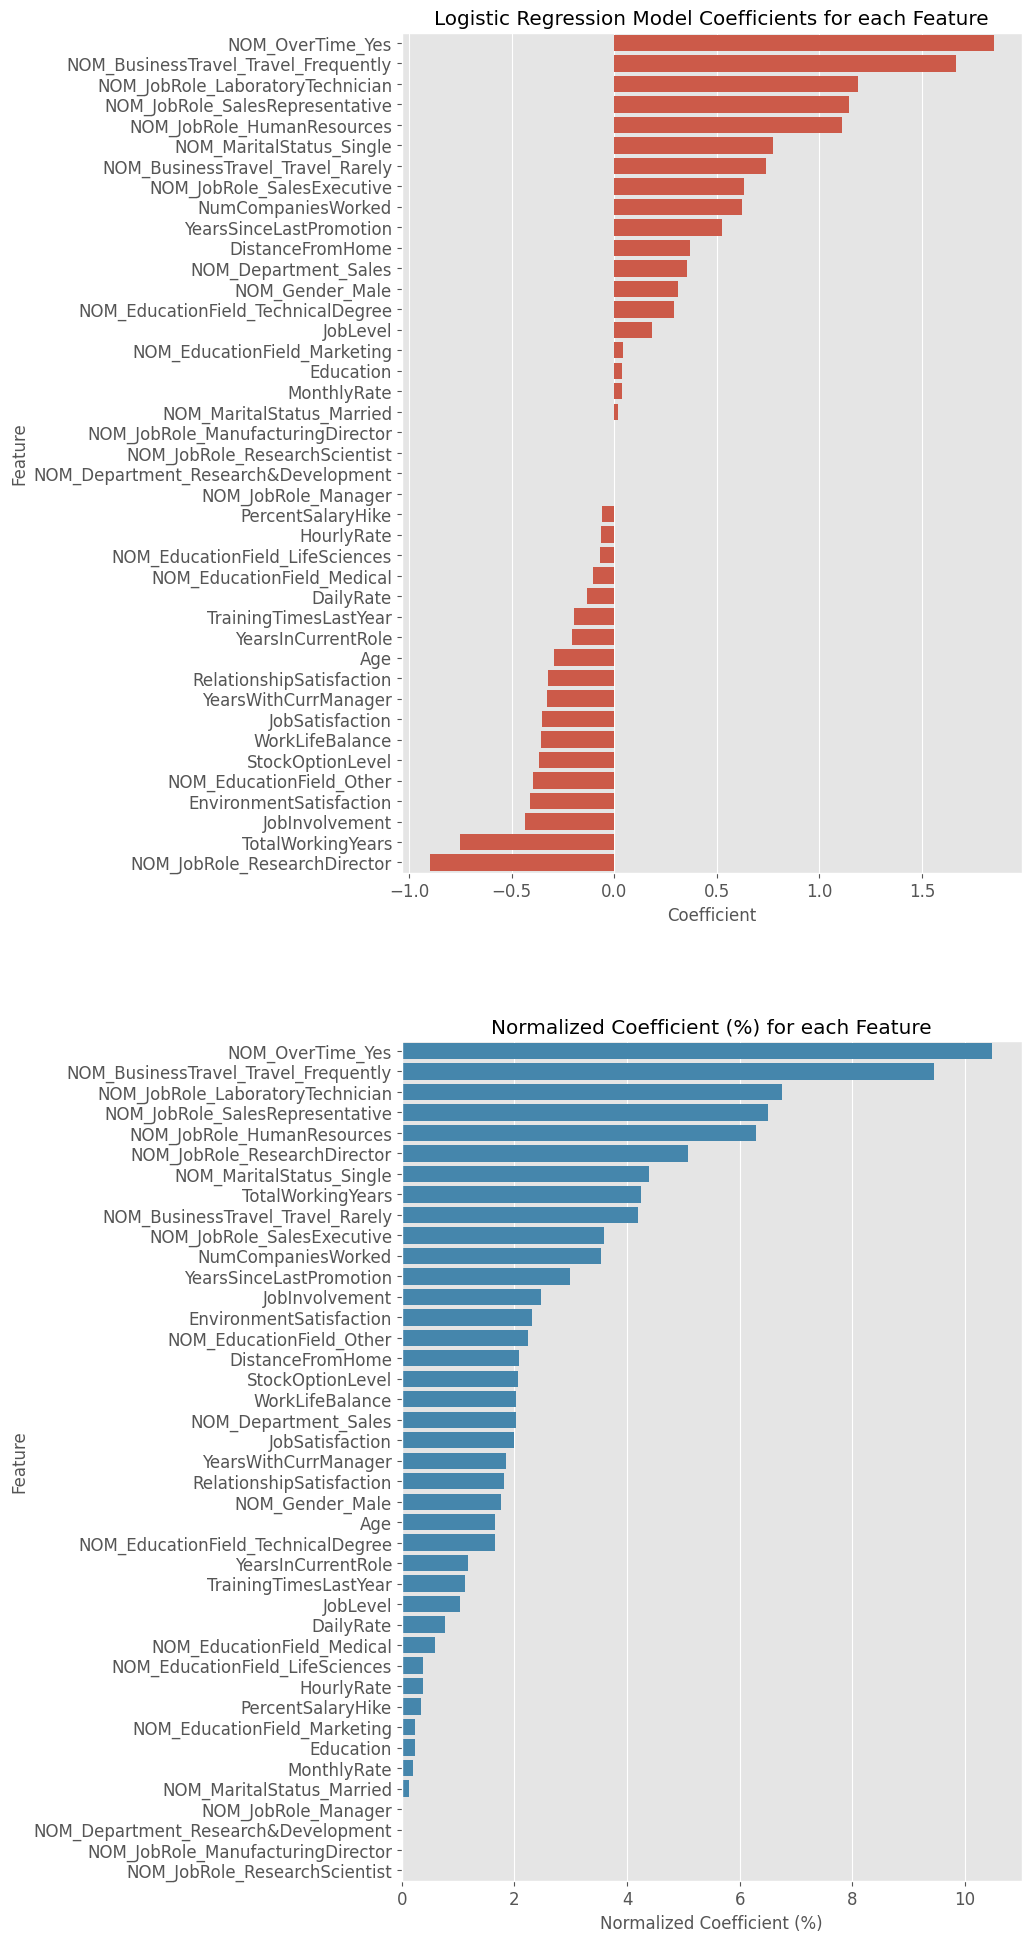

In [373]:
logistic_regression_coef = get_model_feature_importances(X_train, logistic_regression_model, coef=True)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = logistic_regression_coef,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Model Coefficients for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = logistic_regression_coef,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = logistic_regression_coef.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Coefficient (%)")
plt.ylabel("Feature")
plt.title("Normalized Coefficient (%) for each Feature")


In [374]:
scores_dict = {
    "Logistic Regression" : {
        "Train" : roc_auc_score(y_train, logistic_regression_model.predict_proba(X_train)[:, 1]),
        "Test" : roc_auc_score(y_test, logistic_regression_model.predict_proba(X_test)[:, 1])
    }
}

### 5.2. SVM

In [375]:
from sklearn.svm import SVC

In [376]:
svm_model = SVC(kernel = "rbf", random_state = 42)
svm_model.fit(X_train, y_train)
evaluate_model(svm_model, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[862   1]
 [121  45]]
Accuracy: 0.8814382896015549
Precision: 0.9782608695652174
Recall: 0.2710843373493976
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.876907    0.978261  0.881438     0.927584      0.893258
recall       0.998841    0.271084  0.881438     0.634963      0.881438
f1-score     0.933911    0.424528  0.881438     0.679220      0.851737
support    863.000000  166.000000  0.881438  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[368   2]
 [ 60  11]]
Accuracy: 0.8594104308390023
Precision: 0.8461538461538461
Recall: 0.15492957746478872
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.859813   0.846154   0.85941    0.852983      0.857614
recall       0.994595   0.154930   0.85941    0.574762      0.859410
f1-score     0.922306   0.261905   0.85941    0.592105      

In [421]:
svm_paramStandardScaler = {
    "C": [1, 10, 100, 1000],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.0001]
}

svm_grid_search = GridSearchCV(SVC(random_state = 42), param_grid = svm_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
svm_grid_search.fit(X_train, y_train)
print(svm_grid_search.best_params_)
print(svm_grid_search.best_score_)
print(svm_grid_search.best_estimator_)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.8520535326719997
SVC(C=100, gamma=0.001, random_state=42)


In [422]:
svm_model_best = SVC(**svm_grid_search.best_params_, random_state = 42, probability = True)
svm_model_best.fit(X_train, y_train)
evaluate_model(svm_model_best, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[852  11]
 [ 70  96]]
Accuracy: 0.9212827988338192
Precision: 0.897196261682243
Recall: 0.5783132530120482
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.924078    0.897196  0.921283     0.910637      0.919741
recall       0.987254    0.578313  0.921283     0.782784      0.921283
f1-score     0.954622    0.703297  0.921283     0.828959      0.914078
support    863.000000  166.000000  0.921283  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[355  15]
 [ 46  25]]
Accuracy: 0.8616780045351474
Precision: 0.625
Recall: 0.352112676056338
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.885287   0.625000  0.861678    0.755143      0.843381
recall       0.959459   0.352113  0.861678    0.655786      0.861678
f1-score     0.920882   0.450450  0.861678    0.685666      0.845144
support

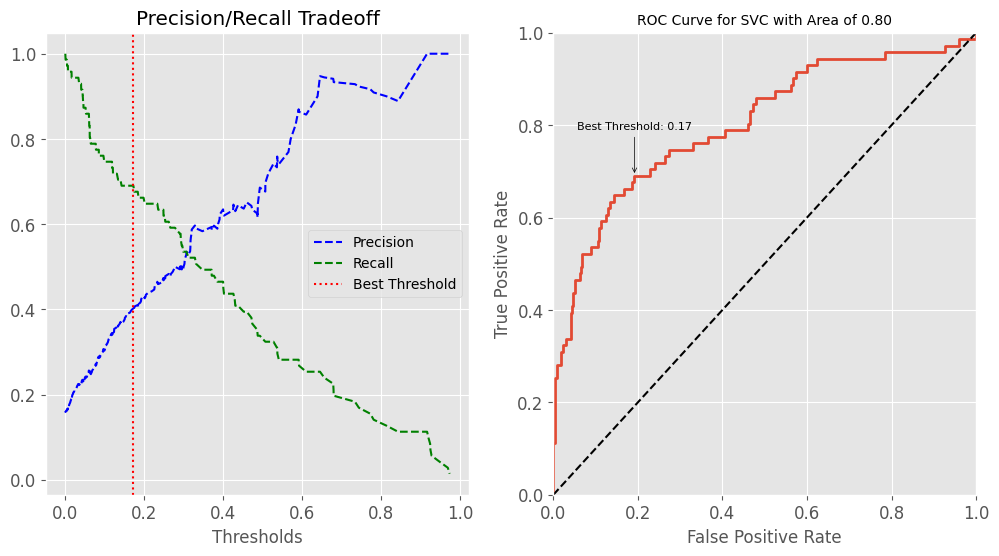

In [423]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(svm_model_best, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(svm_model_best, X_test, y_test)

We can't interpret the coef / features' importances from an RBF-SVM.

In [380]:
scores_dict["SVM"] = {
    "Train" : roc_auc_score(y_train, svm_model_best.predict_proba(X_train)[:, 1]),
    "Test" : roc_auc_score(y_test, svm_model_best.predict_proba(X_test)[:, 1])
}

### 5.3. Random Forest

In [381]:
from sklearn.ensemble import RandomForestClassifier

In [383]:
random_forest_model = RandomForestClassifier(random_state = 42)
random_forest_model.fit(X_train, y_train)
evaluate_model(random_forest_model, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[863   0]
 [  0 166]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  166.0       1.0     1029.0        1029.0

==========TESTING  RESULTS===========
Confusion Matrix:
[[362   8]
 [ 61  10]]
Accuracy: 0.8435374149659864
Precision: 0.5555555555555556
Recall: 0.14084507042253522
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.855792   0.555556  0.843537    0.705674      0.807455
recall       0.978378   0.140845  0.843537    0.559612      0.843537
f1-score     0.912989   0.224719  0.843537    0.568854      0.802179
support    370.000000  71.000000  0.843537  441.000000    441.000000


In [387]:
random_forest_param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [10, 25, 50],
    "min_samples_leaf": [0.01, 0.05, 0.15],
    "max_features": ["sqrt", "log2"]
}

In [417]:
random_forest_search = GridSearchCV(RandomForestClassifier(random_state = 42), random_forest_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
random_forest_search.fit(X_train, y_train)
print(random_forest_search.best_params_)
print(random_forest_search.best_score_)
print(random_forest_search.best_estimator_)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 0.01, 'n_estimators': 500}
0.8160706115409947
RandomForestClassifier(max_depth=10, min_samples_leaf=0.01, n_estimators=500,
                       random_state=42)


In [418]:
random_forest_model_best = RandomForestClassifier(**random_forest_search.best_params_, random_state = 42)
random_forest_model_best.fit(X_train, y_train)
evaluate_model(random_forest_model_best, X_train, X_test, y_train.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[860   3]
 [136  30]]
Accuracy: 0.8649173955296404
Precision: 0.9090909090909091
Recall: 0.18072289156626506
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.863454    0.909091  0.864917     0.886272      0.870816
recall       0.996524    0.180723  0.864917     0.588623      0.864917
f1-score     0.925229    0.301508  0.864917     0.613368      0.824609
support    863.000000  166.000000  0.864917  1029.000000   1029.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[364   6]
 [ 65   6]]
Accuracy: 0.8390022675736961
Precision: 0.5
Recall: 0.08450704225352113
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.848485   0.500000  0.839002    0.674242      0.792380
recall       0.983784   0.084507  0.839002    0.534145      0.839002
f1-score     0.911139   0.144578  0.839002    0.527859      0.787724
suppo

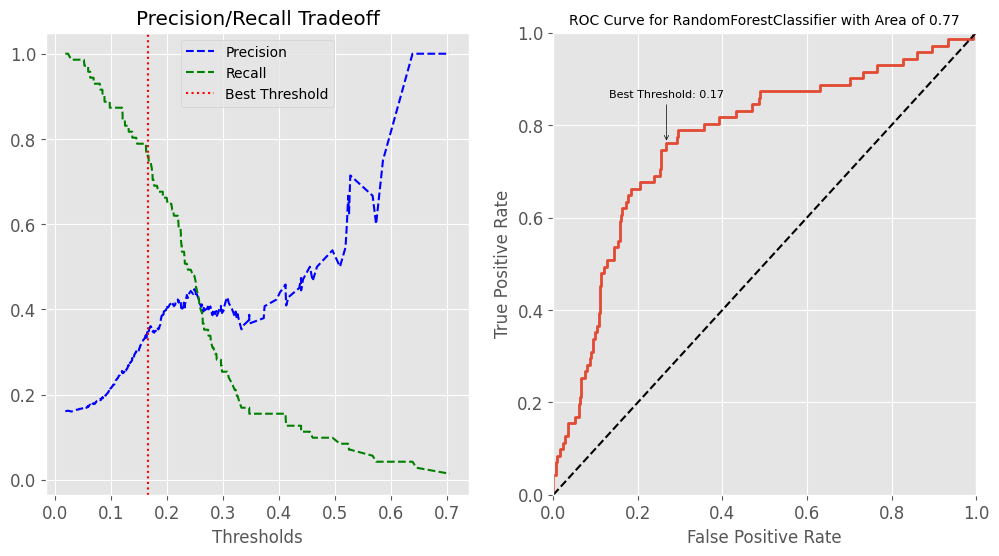

In [419]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(random_forest_model_best, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(random_forest_model_best, X_test, y_test)

Text(0.5, 1.0, 'Normalized Coefficient (%) for each Feature')

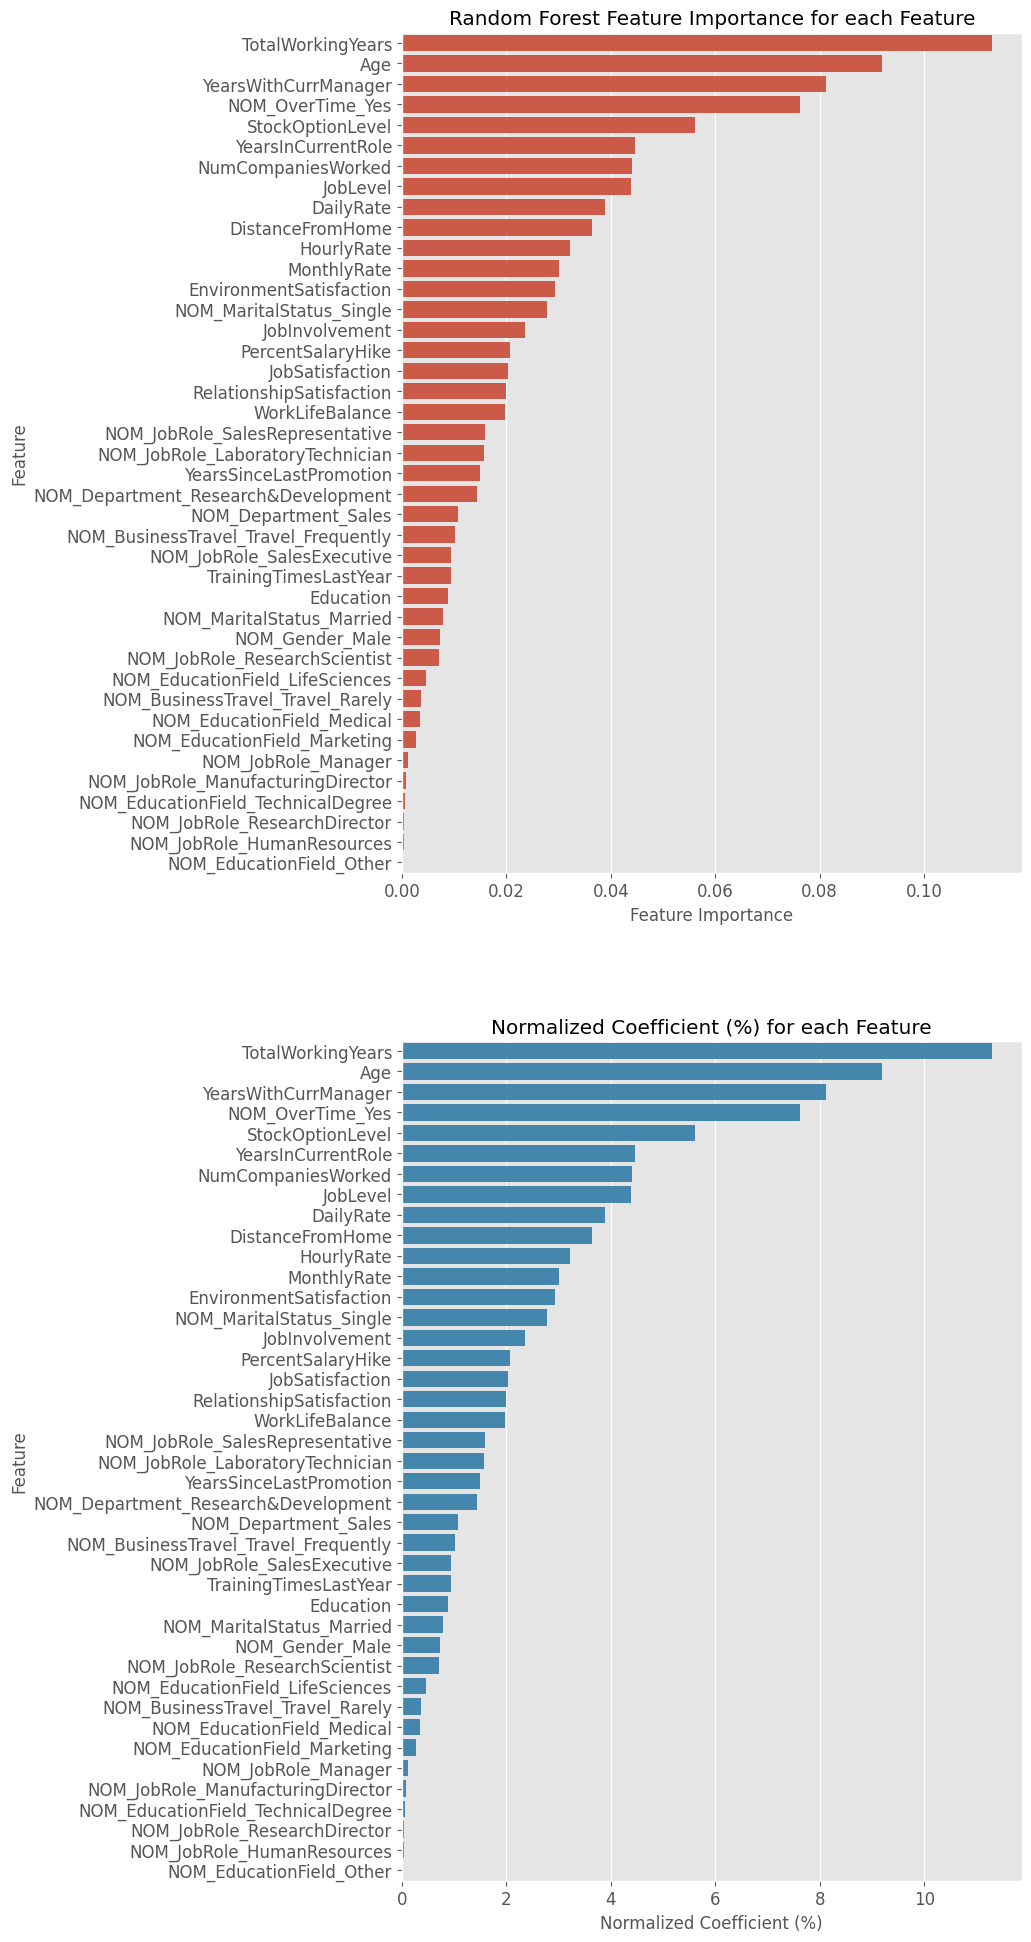

In [420]:
random_forest_importances = get_model_feature_importances(X_train, random_forest_model_best, coef=False)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = random_forest_importances,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = random_forest_importances,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = random_forest_importances.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Coefficient (%)")
plt.ylabel("Feature")
plt.title("Normalized Coefficient (%) for each Feature")


***TODO: Apply XGBoost***

### 5.4. Applyin SMOTE Oversampling

We got noticable good recall scores from our models, but we may want to check if oversampling can not only fix the imbalance problem but also enhance our models' precision.

In [392]:
from imblearn.over_sampling import SMOTE

In [393]:
smote_oversampler = SMOTE(random_state = 0)
X_train_os, y_train_os = smote_oversampler.fit_resample(X_train, y_train)

#### 5.4.1. SMOTE with Logistic Regression

In [394]:
logistic_regression_os_model = LogisticRegression(solver = "liblinear", penalty = "l1", random_state = 42)
logistic_regression_os_model.fit(X_train_os, y_train_os)
evaluate_model(logistic_regression_os_model, X_train_os, X_test, y_train_os, y_test)

==========TRAINING RESULTS===========
Confusion Matrix:
[[800  63]
 [ 99 764]]
Accuracy: 0.9061413673232909
Precision: 0.9238210399032648
Recall: 0.8852838933951332
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.889878    0.923821  0.906141     0.906849      0.906849
recall       0.926999    0.885284  0.906141     0.906141      0.906141
f1-score     0.908059    0.904142  0.906141     0.906101      0.906101
support    863.000000  863.000000  0.906141  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[334  36]
 [ 42  29]]
Accuracy: 0.8231292517006803
Precision: 0.4461538461538462
Recall: 0.4084507042253521
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.888298   0.446154  0.823129    0.667226      0.817114
recall       0.902703   0.408451  0.823129    0.655577      0.823129
f1-score     0.895442   0.426471  0.823129    0.660956      0

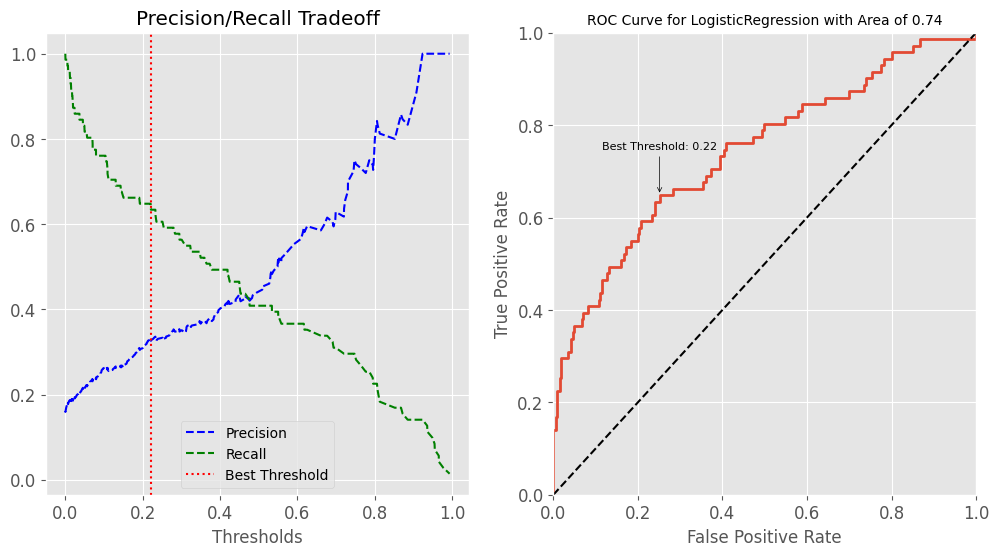

In [395]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(logistic_regression_os_model, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(logistic_regression_os_model, X_test, y_test)

Text(0.5, 1.0, 'Normalized Feature Importance (%) for each Feature')

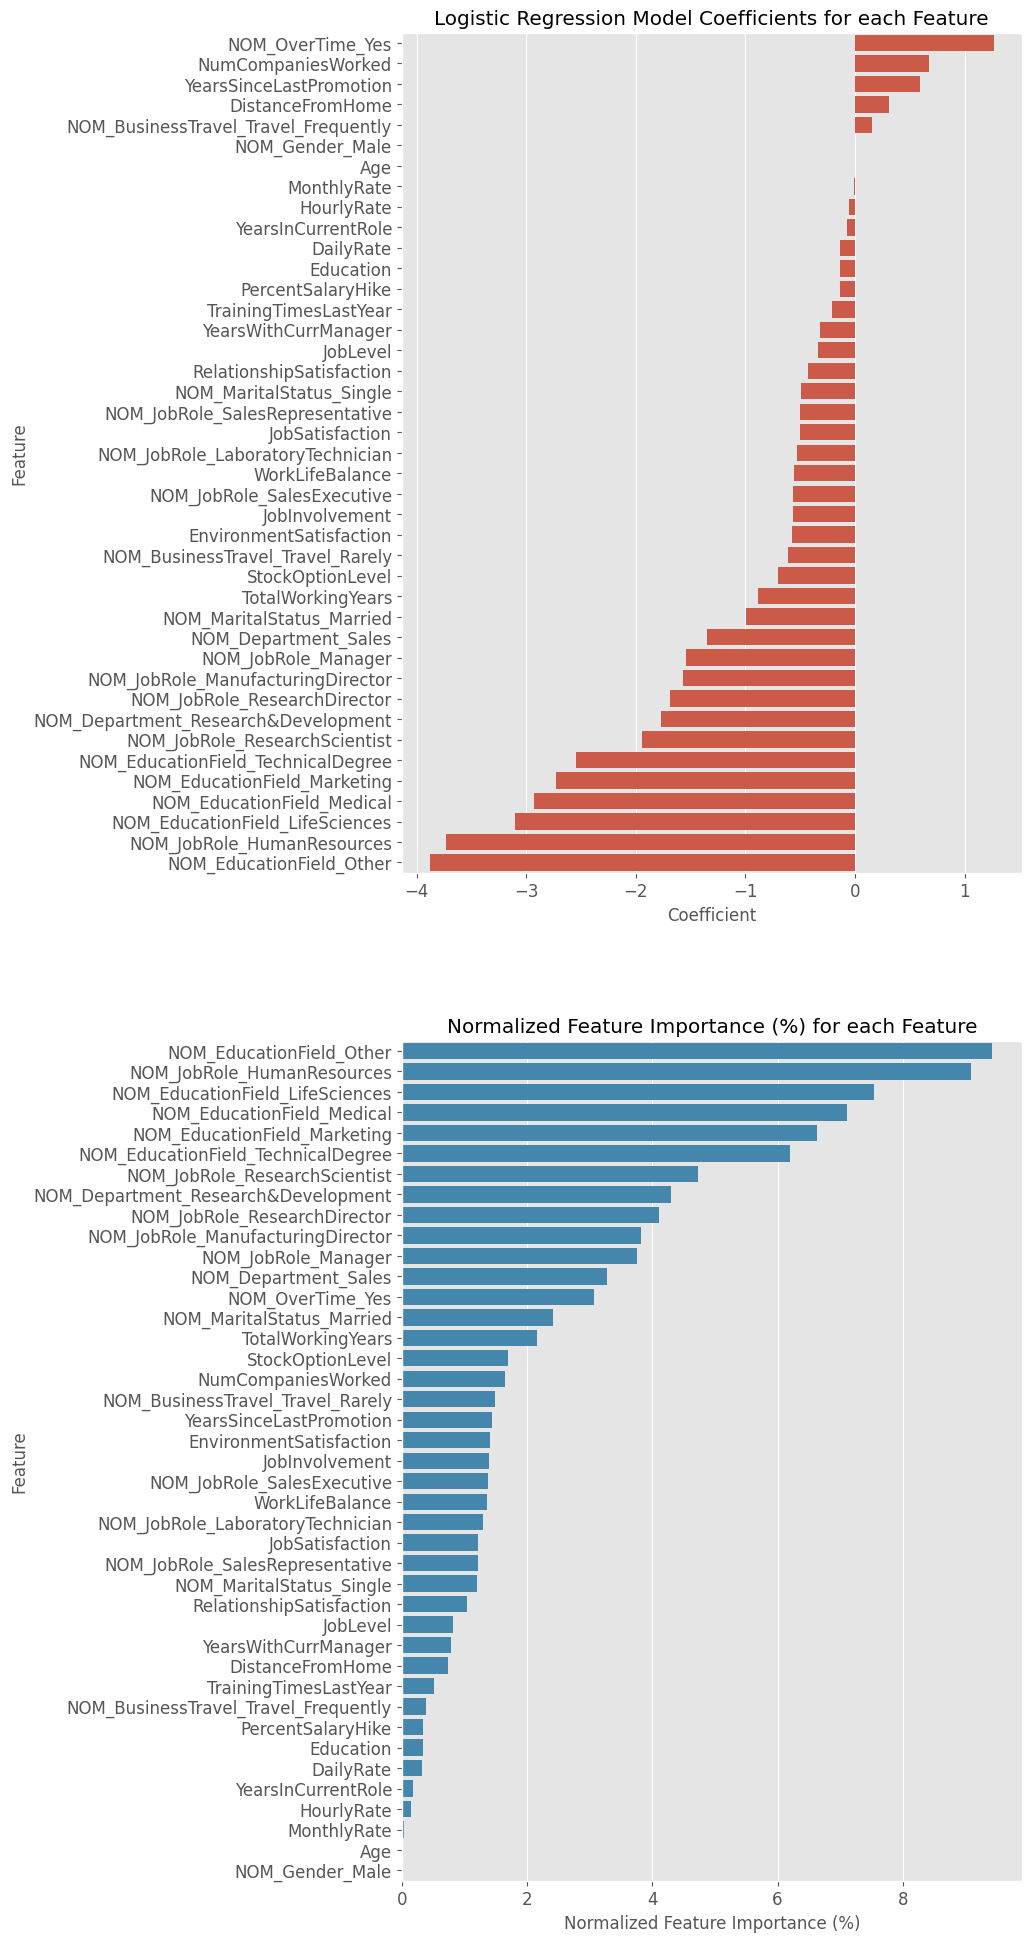

In [396]:
logistic_regression_os_importances = get_model_feature_importances(X_train_os, logistic_regression_os_model, coef=True)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = logistic_regression_os_importances,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Coefficient")
plt.ylabel("Feature")
plt.title("Logistic Regression Model Coefficients for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = logistic_regression_os_importances,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = logistic_regression_os_importances.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Feature Importance (%)")
plt.ylabel("Feature")
plt.title("Normalized Feature Importance (%) for each Feature")


#### 5.4.2. SMOTE with SVM

In [397]:
svm_os_model = SVC(kernel = "rbf", random_state = 42)
svm_os_model.fit(X_train_os, y_train_os)
evaluate_model(svm_os_model, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[821  42]
 [ 82 781]]
Accuracy: 0.9281575898030128
Precision: 0.9489671931956257
Recall: 0.9049826187717266
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.909192    0.948967  0.928158     0.929079      0.929079
recall       0.951333    0.904983  0.928158     0.928158      0.928158
f1-score     0.929785    0.926453  0.928158     0.928119      0.928119
support    863.000000  863.000000  0.928158  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[335  35]
 [ 44  27]]
Accuracy: 0.8208616780045351
Precision: 0.43548387096774194
Recall: 0.38028169014084506
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.883905   0.435484  0.820862    0.659694      0.811710
recall       0.905405   0.380282  0.820862    0.642844      0.820862
f1-score     0.894526   0.406015  0.820862    0.650271     

In [399]:
svm_param_grid = {
    "C": [1, 10, 100, 1000],
    "kernel": ["linear", "rbf"],
    "gamma": [0.001, 0.0001]
}

svm_os_grid_search = GridSearchCV(SVC(random_state = 42), param_grid = svm_param_grid, scoring = "roc_auc", cv = 3, n_jobs = -1)
svm_os_grid_search.fit(X_train_os, y_train_os)
print(svm_os_grid_search.best_params_)
print(svm_os_grid_search.best_score_)
print(svm_os_grid_search.best_estimator_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.9563948831659282
SVC(C=1000, gamma=0.001, random_state=42)


In [402]:
svm_os_model_best = SVC(**svm_os_grid_search.best_params_, random_state = 42, probability = True)
svm_os_model_best.fit(X_train_os, y_train_os)
evaluate_model(svm_os_model_best, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[841  22]
 [ 56 807]]
Accuracy: 0.9548088064889919
Precision: 0.9734620024125452
Recall: 0.9351100811123986
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.937570    0.973462  0.954809     0.955516      0.955516
recall       0.974508    0.935110  0.954809     0.954809      0.954809
f1-score     0.955682    0.953901  0.954809     0.954791      0.954791
support    863.000000  863.000000  0.954809  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[337  33]
 [ 43  28]]
Accuracy: 0.8276643990929705
Precision: 0.45901639344262296
Recall: 0.39436619718309857
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.886842   0.459016  0.827664    0.672929      0.817963
recall       0.910811   0.394366  0.827664    0.652589      0.827664
f1-score     0.898667   0.424242  0.827664    0.661455     

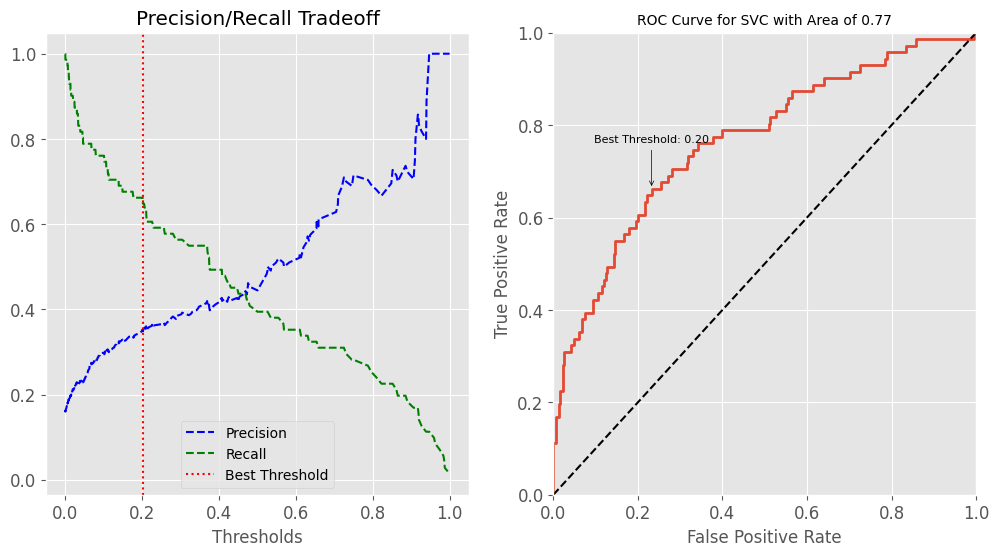

In [403]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(svm_os_model_best, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(svm_os_model_best, X_test, y_test)

#### 5.4.3. SMOTE with RandomForest

In [404]:
random_forest_os_model = RandomForestClassifier(random_state = 42)
random_forest_os_model.fit(X_train_os, y_train_os)
evaluate_model(random_forest_os_model, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[863   0]
 [  0 863]]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    863.0  863.0       1.0     1726.0        1726.0

==========TESTING  RESULTS===========
Confusion Matrix:
[[350  20]
 [ 58  13]]
Accuracy: 0.8231292517006803
Precision: 0.3939393939393939
Recall: 0.18309859154929578
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.857843   0.393939  0.823129    0.625891      0.783156
recall       0.945946   0.183099  0.823129    0.564522      0.823129
f1-score     0.899743   0.250000  0.823129    0.574871      0.795136
support    370.000000  71.000000  0.823129  441.000000    441.000000


In [405]:
random_forest_param_grid = {
    "n_estimators": [300, 500, 1000],
    "max_depth": [10, 25, 50],
    "min_samples_leaf": [0.01, 0.05, 0.15],
    "max_features": ["sqrt", "log2"]
}

random_forest_os_search = GridSearchCV(RandomForestClassifier(random_state = 42), random_forest_param_grid, scoring = "roc_auc", cv = 3)
random_forest_os_search.fit(X_train_os, y_train_os)
print(random_forest_os_search.best_params_)
print(random_forest_os_search.best_score_)
print(random_forest_os_search.best_estimator_)

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 0.01, 'n_estimators': 1000}
0.9530572549235744
RandomForestClassifier(max_depth=10, max_features='log2', min_samples_leaf=0.01,
                       n_estimators=1000, random_state=42)


In [406]:
random_forest_os_model_best = RandomForestClassifier(**random_forest_os_search.best_params_, random_state = 42)
random_forest_os_model_best.fit(X_train, y_train)
evaluate_model(random_forest_os_model_best, X_train_os, X_test, y_train_os.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

==========TRAINING RESULTS===========
Confusion Matrix:
[[862   1]
 [727 136]]
Accuracy: 0.578215527230591
Precision: 0.9927007299270073
Recall: 0.15758980301274622
Classification Report:
                    0           1  accuracy    macro avg  weighted avg
precision    0.542480    0.992701  0.578216     0.767590      0.767590
recall       0.998841    0.157590  0.578216     0.578216      0.578216
f1-score     0.703100    0.272000  0.578216     0.487550      0.487550
support    863.000000  863.000000  0.578216  1726.000000   1726.000000

==========TESTING  RESULTS===========
Confusion Matrix:
[[367   3]
 [ 67   4]]
Accuracy: 0.8412698412698413
Precision: 0.5714285714285714
Recall: 0.056338028169014086
Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.845622   0.571429   0.84127    0.708525      0.801478
recall       0.991892   0.056338   0.84127    0.524115      0.841270
f1-score     0.912935   0.102564   0.84127    0.507750     

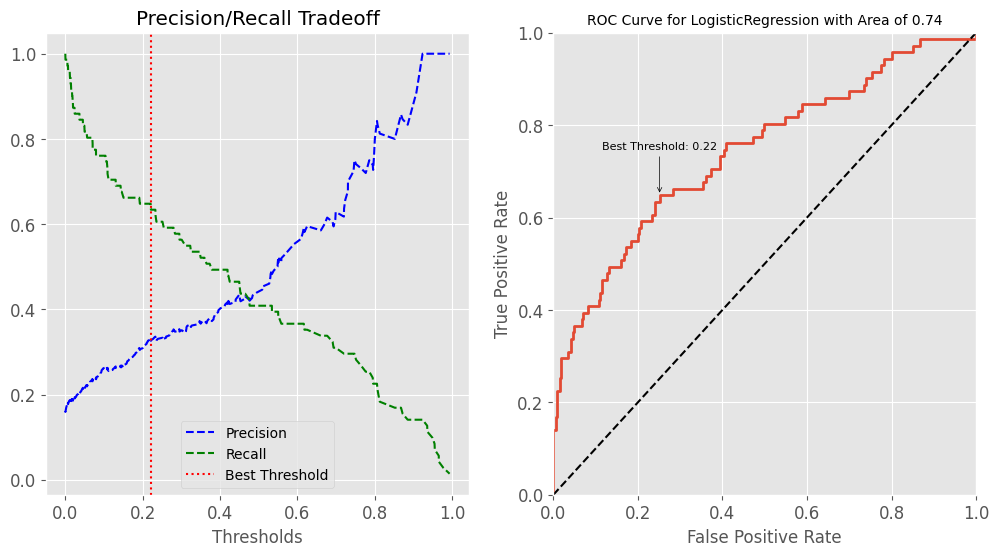

In [407]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_precision_recall_curve(logistic_regression_os_model, X_test, y_test)
plt.subplot(1, 2, 2)
plot_roc_curve(logistic_regression_os_model, X_test, y_test)

Text(0.5, 1.0, 'Normalized Coefficient (%) for each Feature')

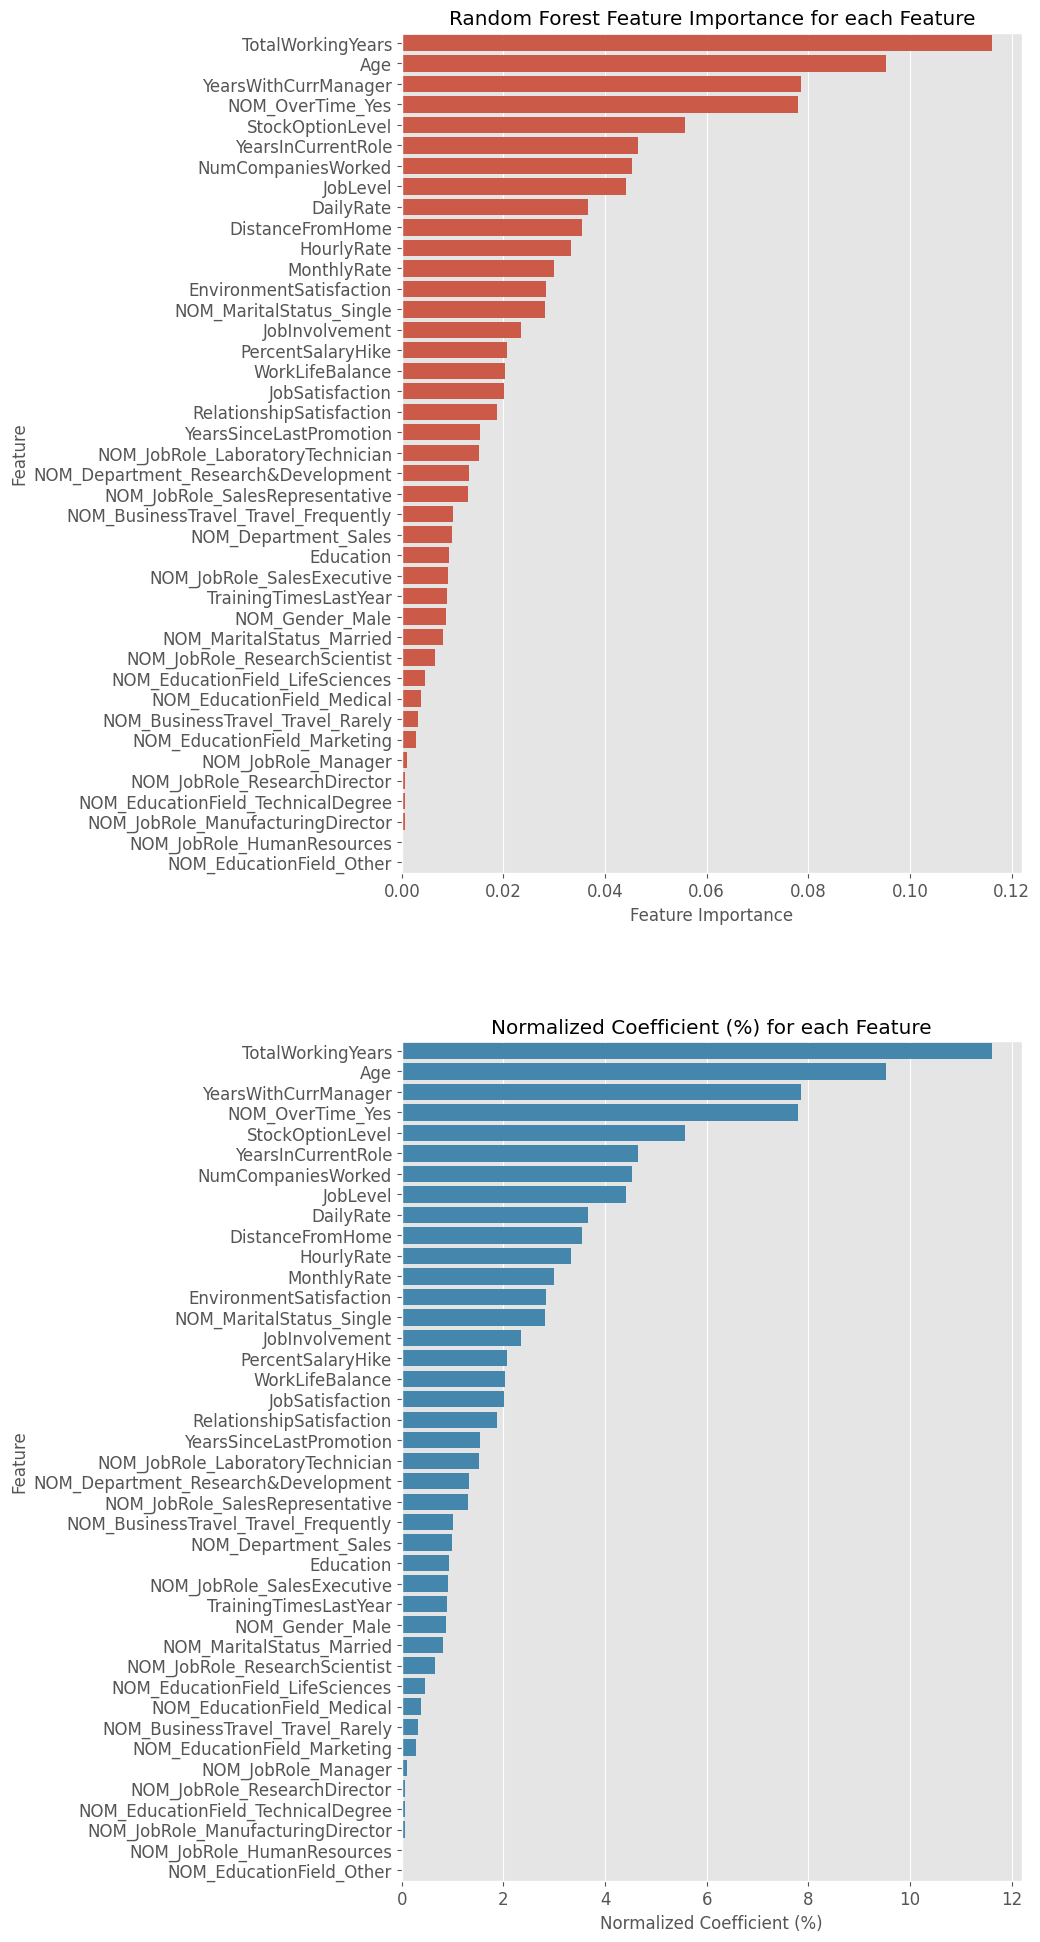

In [408]:
random_forest_os_importances = get_model_feature_importances(X_train_os, random_forest_model_best, coef=False)

plt.figure(figsize=(8, 24))
plt.subplot(2, 1, 1)
sns.barplot(
    data = random_forest_os_importances,
    y = "feature",
    x = "importance",
    color = sns.color_palette()[0]
)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance for each Feature")

plt.subplot(2, 1, 2)
sns.barplot(
    data = random_forest_os_importances,
    y = "feature",
    x = "normalized_importance",
    color = sns.color_palette()[1],
    order = random_forest_os_importances.sort_values("normalized_importance", ascending = False, ignore_index = True).feature
)
plt.xlabel("Normalized Coefficient (%)")
plt.ylabel("Feature")
plt.title("Normalized Coefficient (%) for each Feature")